# Correlation Plots

Data Frame 1

Created all the NA to zeros to have a numerical study of the data

In [37]:
library(readxl)
library(RColorBrewer)
library(corrplot)
#install.packages("psych")
#install.packages("PerformanceAnalytics")
library(PerformanceAnalytics)
library(psych)
library(mvtnorm) # col.norm
library(tilting) # col.norm
#install.packages('ggplot2')
library(ggplot2)
library("np") #npreg: you may need to install it
#install.packages(c("FactoMineR", "factoextra"))
library("FactoMineR")
library(tidyverse) #data Manipulation
library(cluster) #Clustering algorithms
library(factoextra)#Clustering Algorithms & Visualization
library(gridExtra)
#install.packages("dendextend")
#install.packages("ggplot2")
#install.packages("rlang")
library(dendextend) # For fancy deprograms
library(rlang) # clustering cutting

In [38]:
dfsimple <- read_excel("../../results/dfsimple.xlsx",sheet=1)
df.wb <- read_excel("../../results/df-wb.xlsx",sheet=1)
head(dfsimple)
head(df.wb)
max(dfsimple$Year)


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,3
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,4


Country,Country Code,Year,Time Code,cgdp,tpop,upop,popd,land,lita,lity,mori
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,AFG,2018,YR2018,18353881130,37172386,25.495,56.93776,652860,43.01972,0.75933,62.5
Albania,ALB,2018,YR2018,15147020535,2866376,60.319,104.61226,27400,98.14115,1.00582,9.5
Algeria,DZA,2018,YR2018,175405660377,42228429,72.629,17.73008,2381740,81.40784,0.99650,23.8
American Samoa,ASM,2018,YR2018,636000000,55465,87.153,277.32500,200,0.00000,0.00000,0.0
Andorra,AND,2018,YR2018,3218316013,77006,88.062,163.84255,470,0.00000,0.00000,3.1
Angola,AGO,2018,YR2018,101353230785,30809762,65.514,24.71305,1246700,0.00000,0.00000,77.7


[1] 2019

In [39]:
dfsimple[is.na(dfsimple)] <- 0 # Convert all your NA to 0 to keep numeric values
head(dfsimple ,7)

Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,3
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,4


imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
71.2,2.3,4.8,14.2,20.1,18.5,4.7,0.4,1.5,4.4,...,5.0,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1
98.4,48.8,5.2,2.4,1.4,4.1,2.5,0.0,14.1,0.2,...,0.9,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1
66.9,4.3,9.7,10.3,1.9,9.1,3.3,1.7,9.7,4.3,...,7.5,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3
99.9,88.3,8.0,0.5,0.2,0.2,1.0,0.0,1.5,0.0,...,0.1,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1
90.6,34.0,19.7,3.5,9.3,6.2,7.5,0.0,9.5,0.7,...,3.4,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0
97.8,4.3,3.3,2.7,86.4,0.2,0.0,0.4,0.0,0.1,...,1.3,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3
71.7,5.1,4.2,13.0,28.9,4.4,0.3,0.4,0.2,0.3,...,7.3,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.48,0.09,-0.13,0.06,-0.16,-0.10,0.05,-0.01,-0.02,...,-0.30,0.56,-0.46,-0.48,-0.06,-0.09,-0.01,0.47,-0.14,-0.22
phom,0.48,1.00,-0.02,-0.35,-0.37,-0.20,-0.21,-0.11,0.13,-0.15,...,-0.43,0.50,-0.63,-0.45,-0.15,-0.14,-0.21,0.61,-0.12,-0.45
pipy,0.09,-0.02,1.00,0.29,-0.28,-0.24,-0.10,-0.08,-0.06,-0.05,...,-0.13,0.22,-0.12,-0.17,0.09,0.08,-0.26,0.16,0.02,-0.14
ptap,-0.13,-0.35,0.29,1.00,-0.10,0.02,0.24,-0.23,-0.11,-0.17,...,0.49,-0.38,0.55,0.45,-0.18,0.13,-0.25,-0.29,-0.27,0.19
bore,0.06,-0.37,-0.28,-0.10,1.00,0.07,-0.17,-0.13,-0.20,-0.06,...,0.16,-0.18,0.35,0.08,0.23,0.21,0.30,-0.35,-0.15,0.40
pwel,-0.16,-0.20,-0.24,0.02,0.07,1.00,-0.06,-0.16,0.00,0.16,...,0.15,-0.46,0.19,0.19,0.07,0.14,0.04,-0.18,-0.14,0.01
pspr,-0.10,-0.21,-0.10,0.24,-0.17,-0.06,1.00,-0.08,-0.07,-0.02,...,0.40,-0.25,0.29,0.36,-0.16,-0.17,-0.15,-0.20,-0.11,0.17
rain,0.05,-0.11,-0.08,-0.23,-0.13,-0.16,-0.08,1.00,-0.07,0.00,...,-0.20,0.08,-0.30,-0.19,0.31,-0.07,0.35,-0.05,0.75,-0.16
truc,-0.01,0.13,-0.06,-0.11,-0.20,0.00,-0.07,-0.07,1.00,0.09,...,0.04,0.20,-0.22,0.08,-0.19,-0.07,-0.16,0.28,-0.07,-0.27
ctan,-0.02,-0.15,-0.05,-0.17,-0.06,0.16,-0.02,0.00,0.09,1.00,...,-0.10,0.05,-0.04,-0.08,-0.15,0.07,0.14,0.00,0.01,0.06


,imws,phom,pipy,ptap,bore,pwel,pspr,rain,truc,ctan,...,liws,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc
imws,1.00,0.48,0.09,-0.13,0.06,-0.16,-0.10,0.05,-0.01,-0.02,...,-0.30,0.56,-0.46,-0.48,-0.06,-0.09,-0.01,0.47,-0.14,-0.22
phom,0.48,1.00,-0.02,-0.35,-0.37,-0.20,-0.21,-0.11,0.13,-0.15,...,-0.43,0.50,-0.63,-0.45,-0.15,-0.14,-0.21,0.61,-0.12,-0.45
pipy,0.09,-0.02,1.00,0.29,-0.28,-0.24,-0.10,-0.08,-0.06,-0.05,...,-0.13,0.22,-0.12,-0.17,0.09,0.08,-0.26,0.16,0.02,-0.14
ptap,-0.13,-0.35,0.29,1.00,-0.10,0.02,0.24,-0.23,-0.11,-0.17,...,0.49,-0.38,0.55,0.45,-0.18,0.13,-0.25,-0.29,-0.27,0.19
bore,0.06,-0.37,-0.28,-0.10,1.00,0.07,-0.17,-0.13,-0.20,-0.06,...,0.16,-0.18,0.35,0.08,0.23,0.21,0.30,-0.35,-0.15,0.40
pwel,-0.16,-0.20,-0.24,0.02,0.07,1.00,-0.06,-0.16,0.00,0.16,...,0.15,-0.46,0.19,0.19,0.07,0.14,0.04,-0.18,-0.14,0.01


Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,cart,mcyc,pcar,boat,wigc,clusters
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,1
Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,3
Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,4
Benin,2018,DHS,71.7,5.1,4.2,13.0,28.9,4.4,0.3,...,37.4,49.8,12.1,19.4,3.2,56.1,4.2,0.2,0.3,1
Bolivia,2008,DHS,87.3,24.6,54.1,5.3,0.0,1.7,0.0,...,88.0,11.2,0.7,36.6,0.0,6.5,15.6,0.0,0.0,3
Burkina Faso,2018,MIS,80.9,2.6,9.6,18.4,40.6,9.0,0.2,...,17.1,49.8,32.6,82.0,38.6,58.2,3.0,0.0,0.2,4


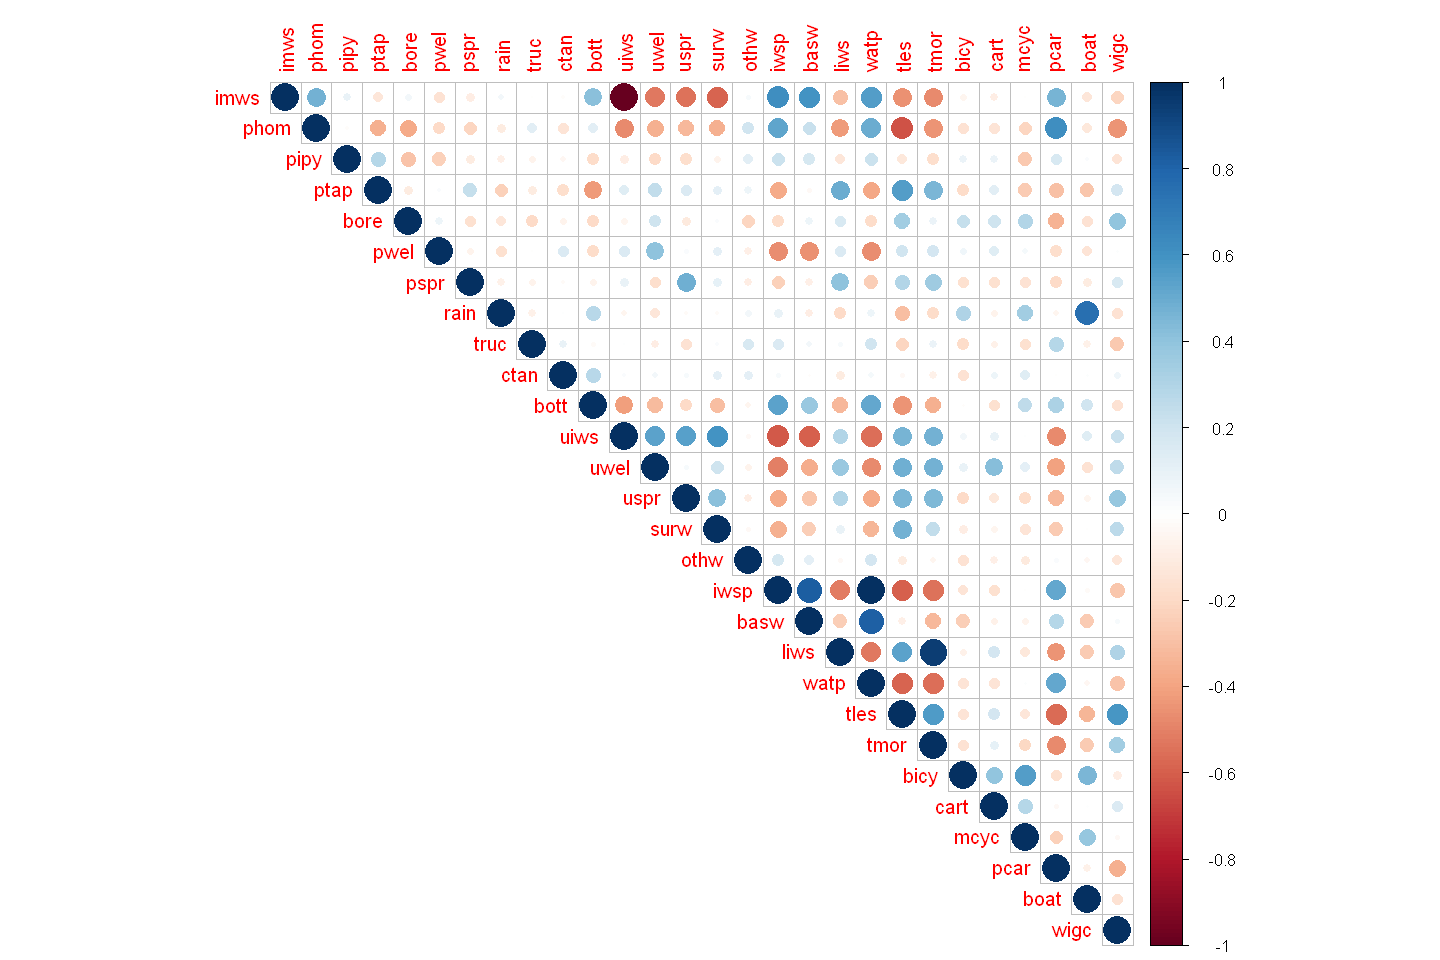

In [46]:
my_data <- dfsimple[, c(4:31)]
head(my_data, 7)
res <- cor(my_data)
round(res, 2)
M<-cor(my_data)
head(round(M,2))
corrplot(M, type="upper", tl.cex = 1)

as.data.frame(dfsimple)

# Advanced Correlation Graphs

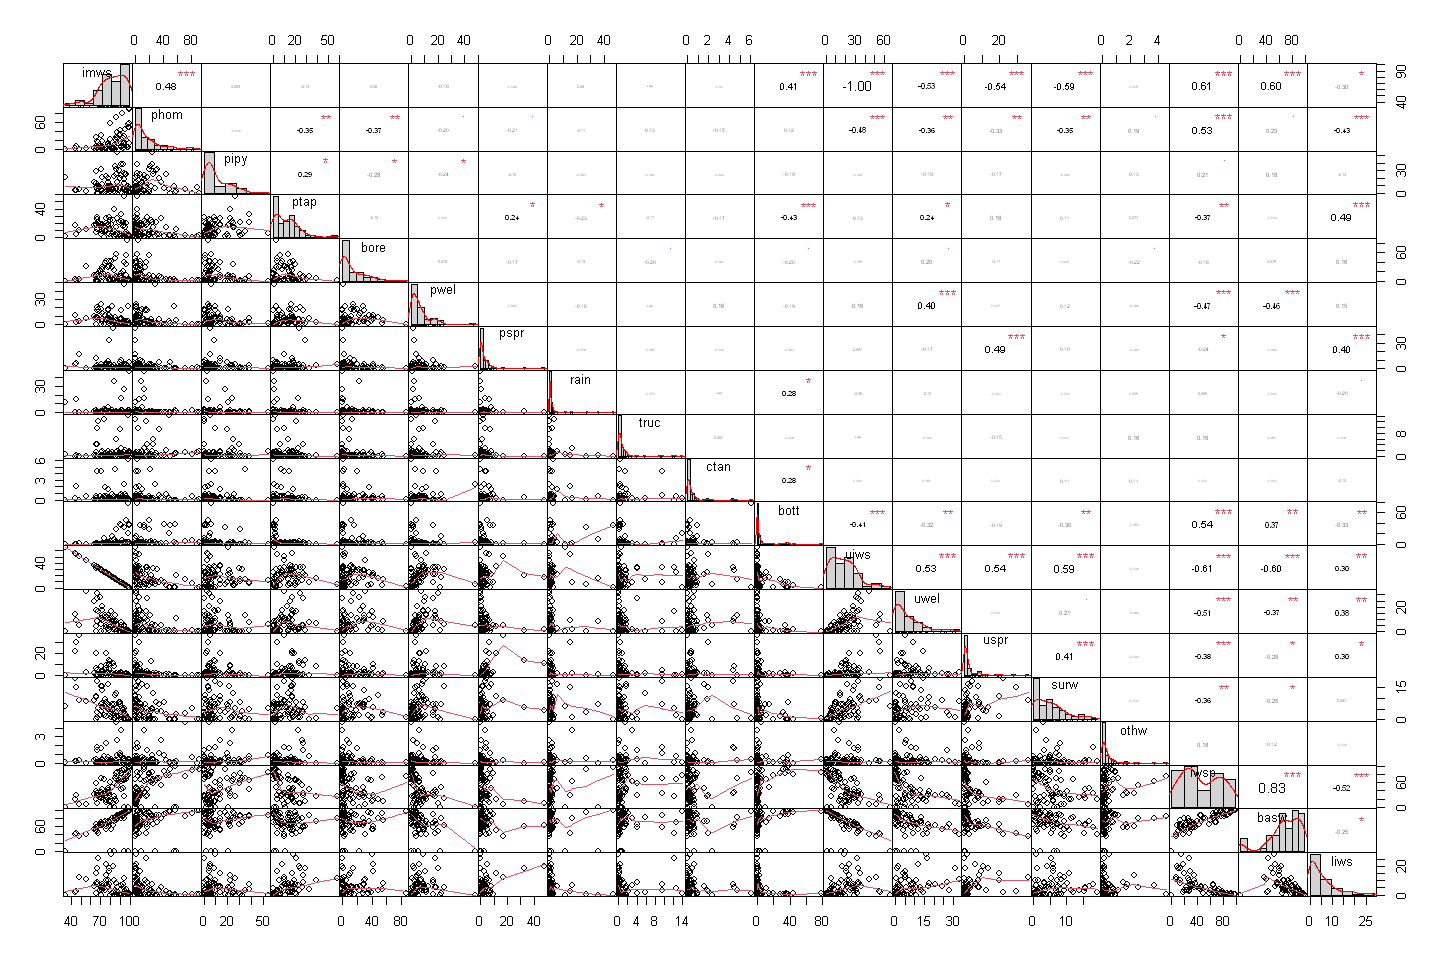

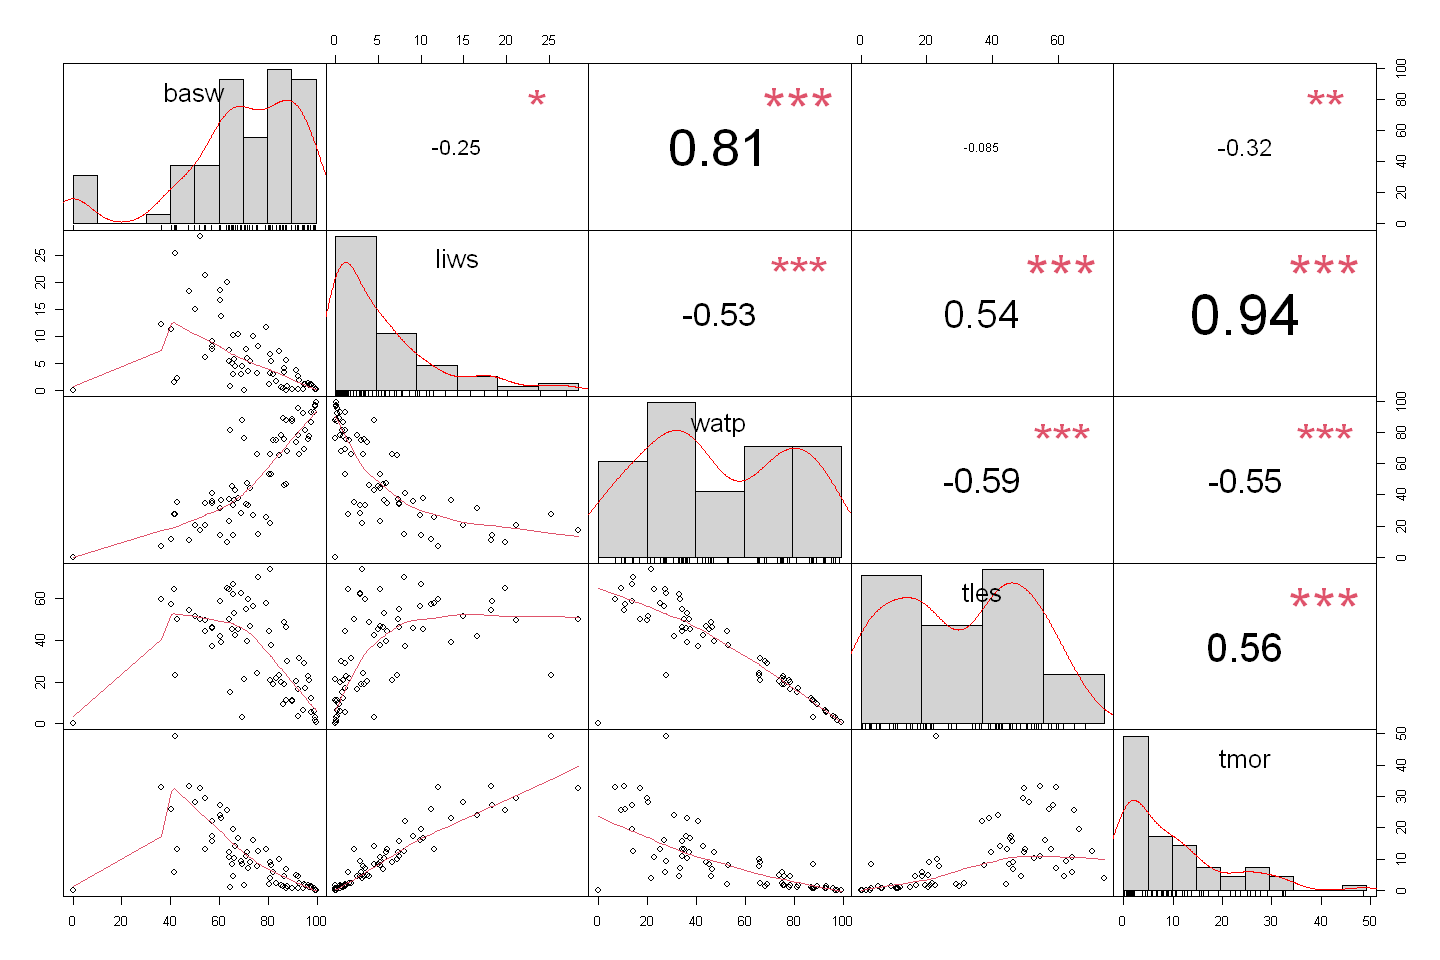

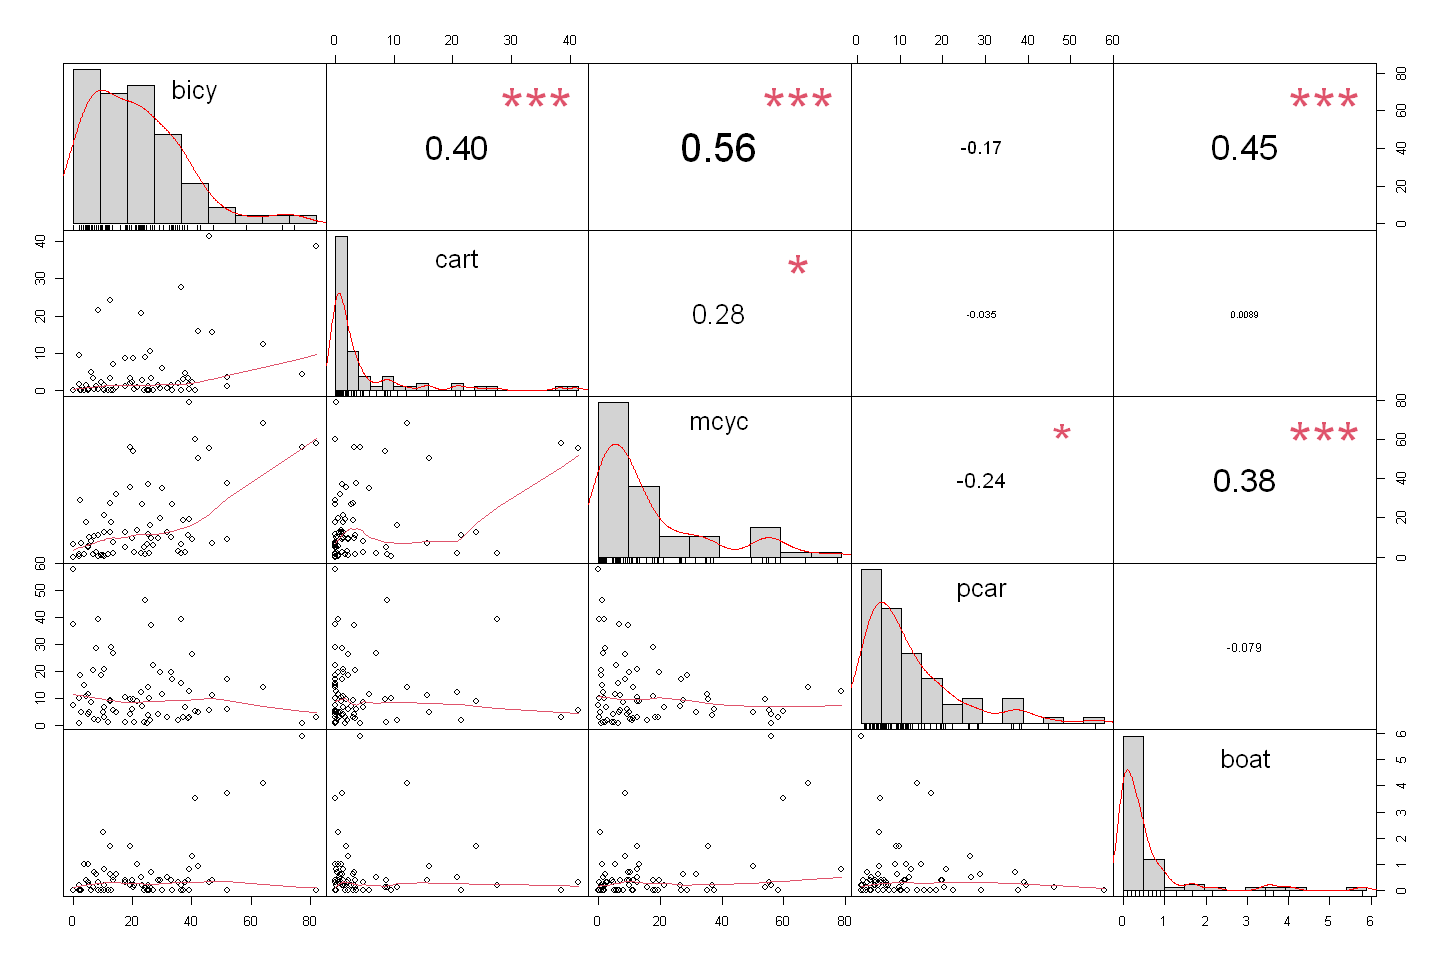

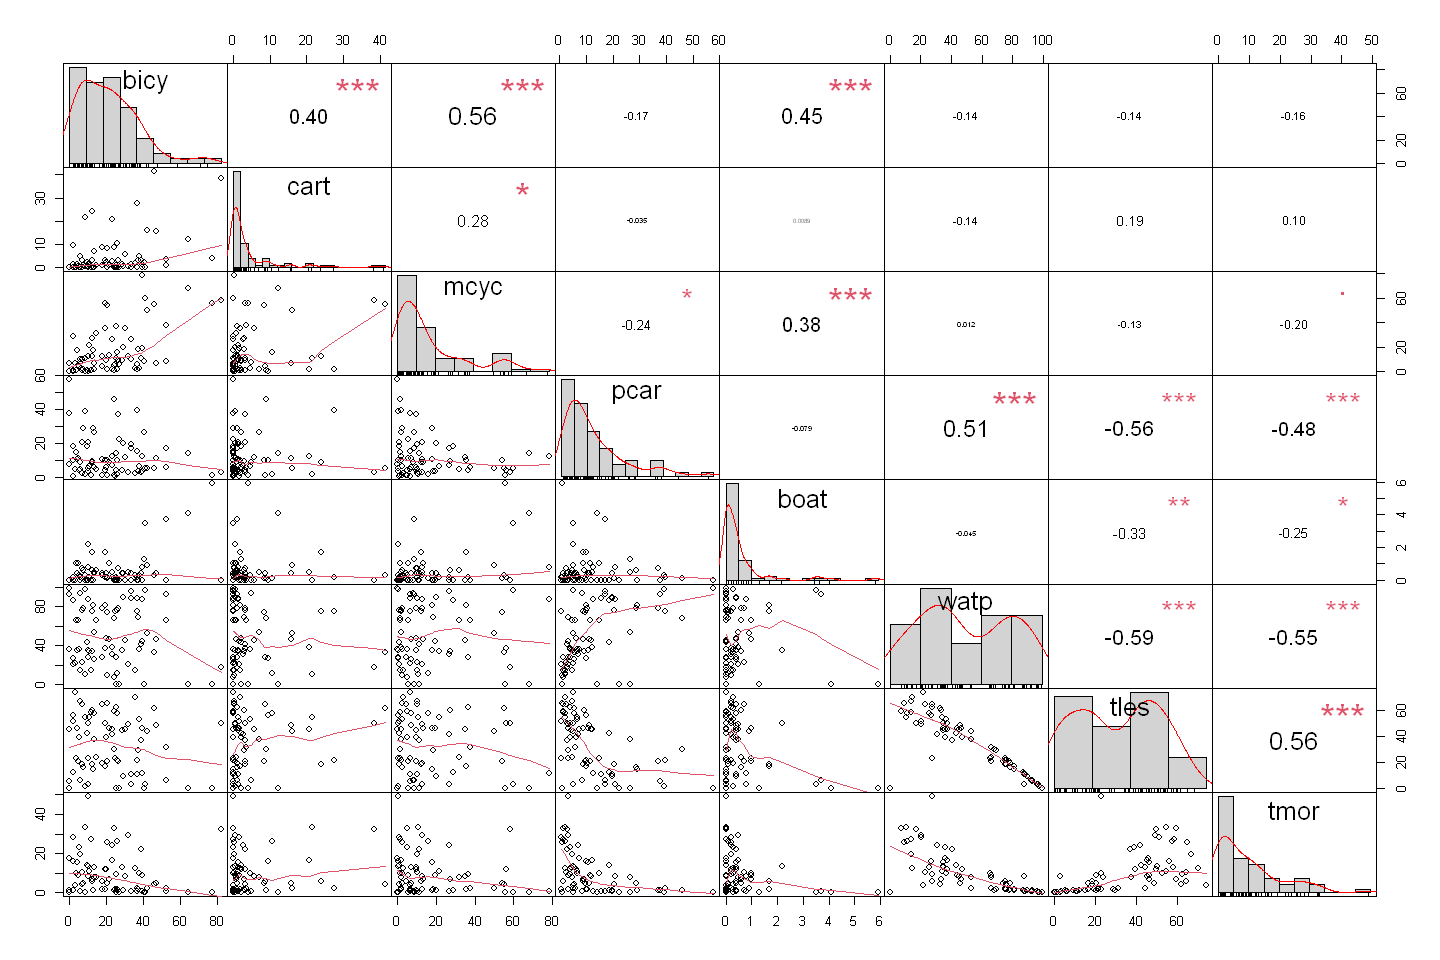

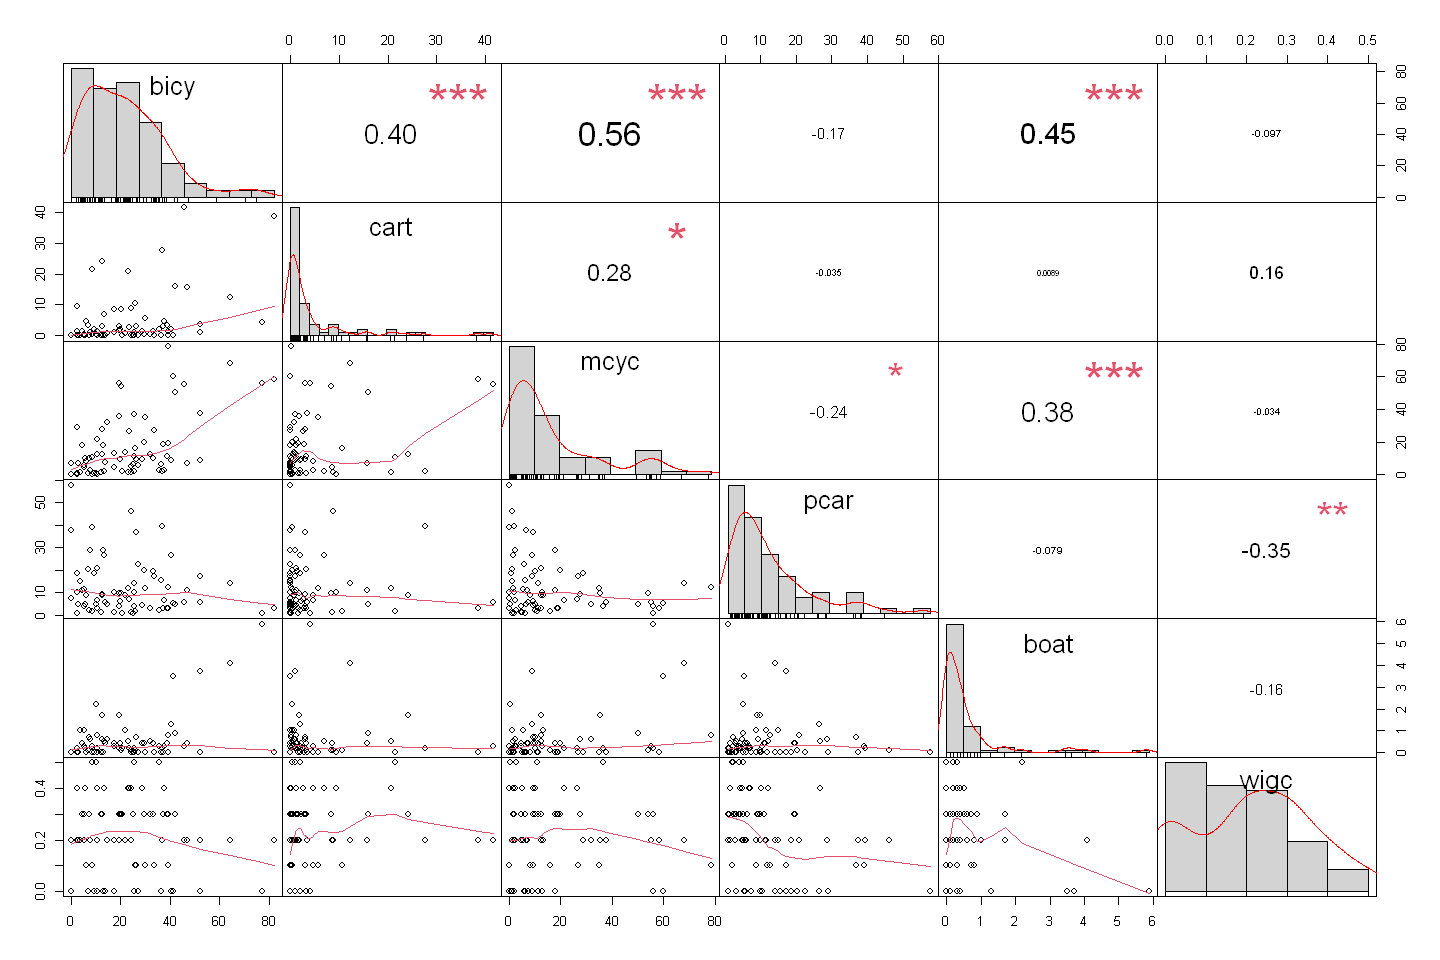

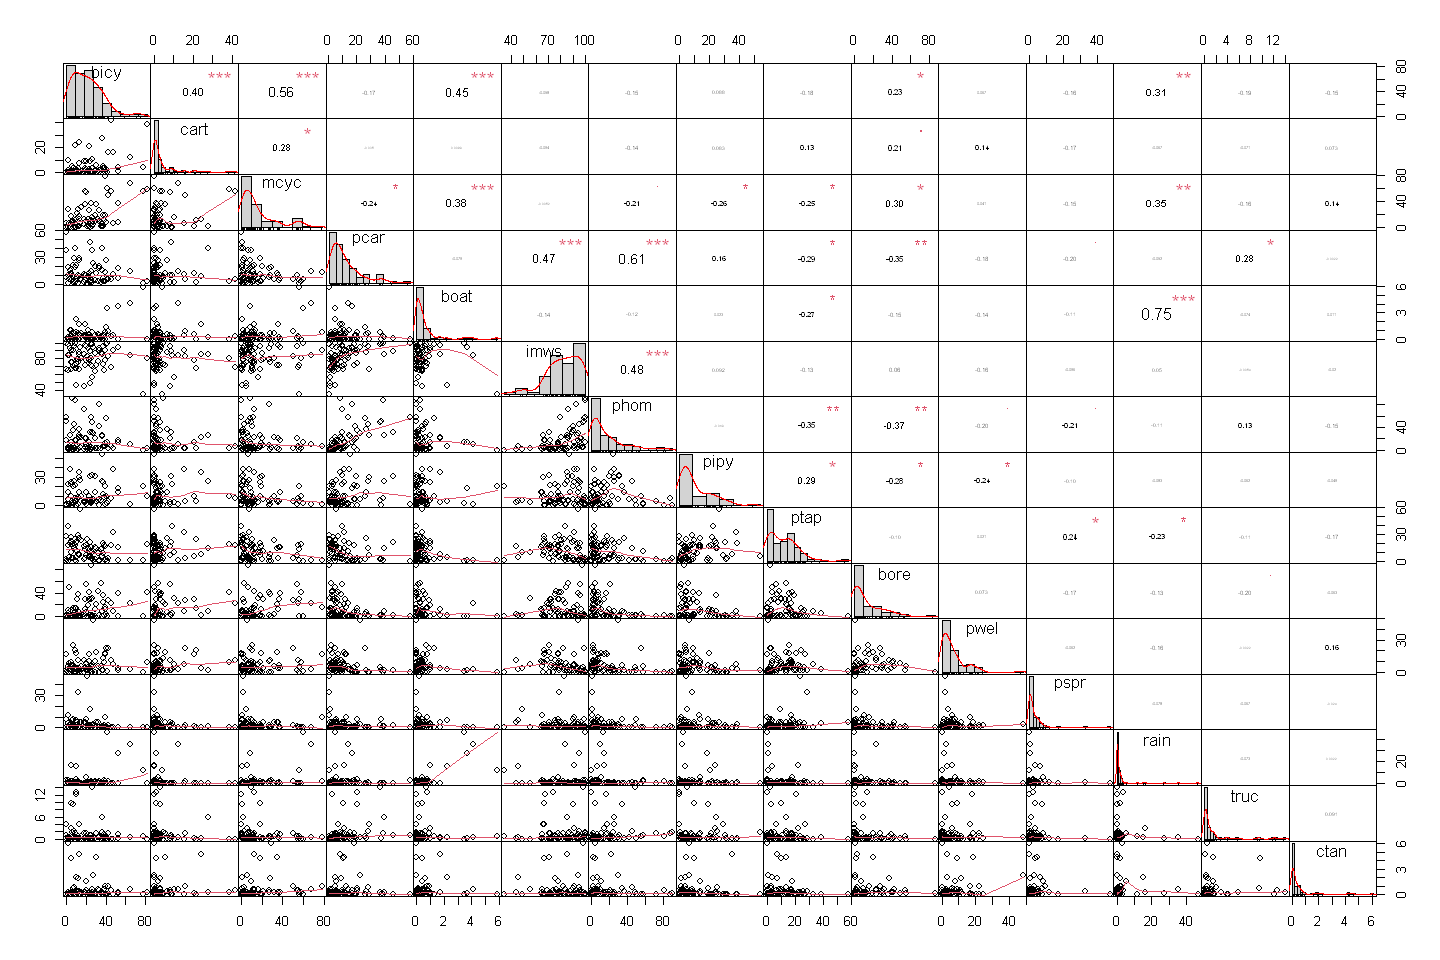

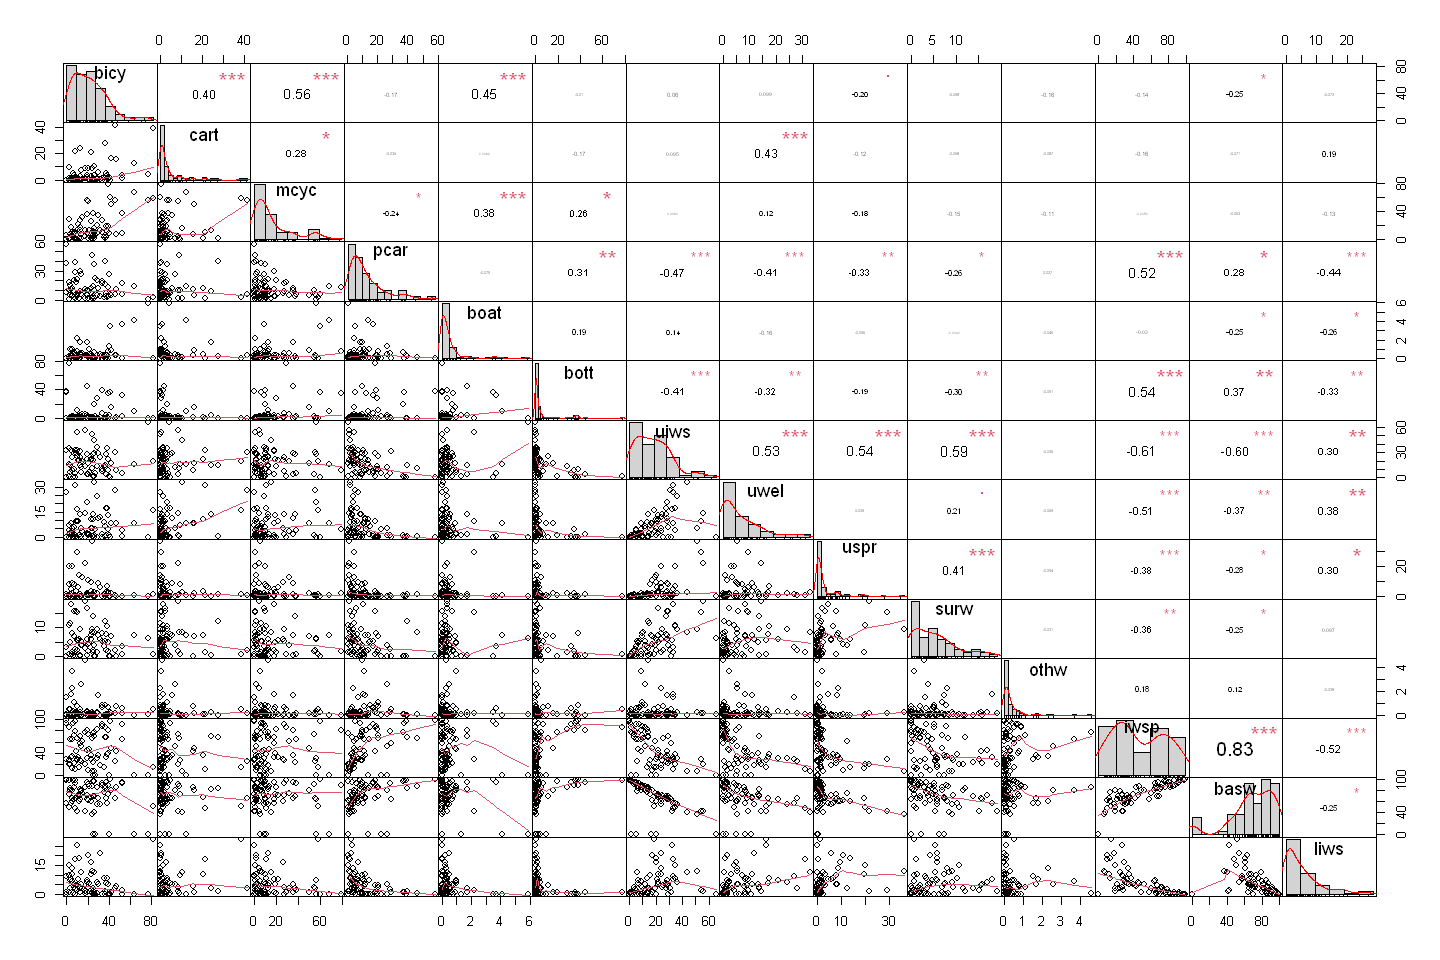

In [41]:
#sample for water sources
my_data_acc <- dfsimple[, c(4:22)]
chart.Correlation(my_data_acc, histogram=TRUE, pch=19 , tl.cex = .7 )
#sample for location/premise
my_data_loc <- dfsimple[, c(21:25)]
chart.Correlation(my_data_loc, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation
my_data_move <- dfsimple[, c(26:30)]
chart.Correlation(my_data_move, histogram=TRUE, pch=19 , tl.cex = .5 )
#Comparison with Transportation and Time it gets to the source of water
my_data_time <- dfsimple[, c(26:30,23:25)]
chart.Correlation(my_data_time, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation compared with wealth
my_data_money <- dfsimple[, c(26:31)]
chart.Correlation(my_data_money, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 1 comparison
my_data_water1 <- dfsimple[, c(26:30, 4:13)]
chart.Correlation(my_data_water1, histogram=TRUE, pch=19 , tl.cex = .5 )
#sample for transportation, water retrieving part 2 comparison
my_data_water2 <- dfsimple[, c(26:30, 14:22)]
chart.Correlation(my_data_water2, histogram=TRUE, pch=19 , tl.cex = .5 )

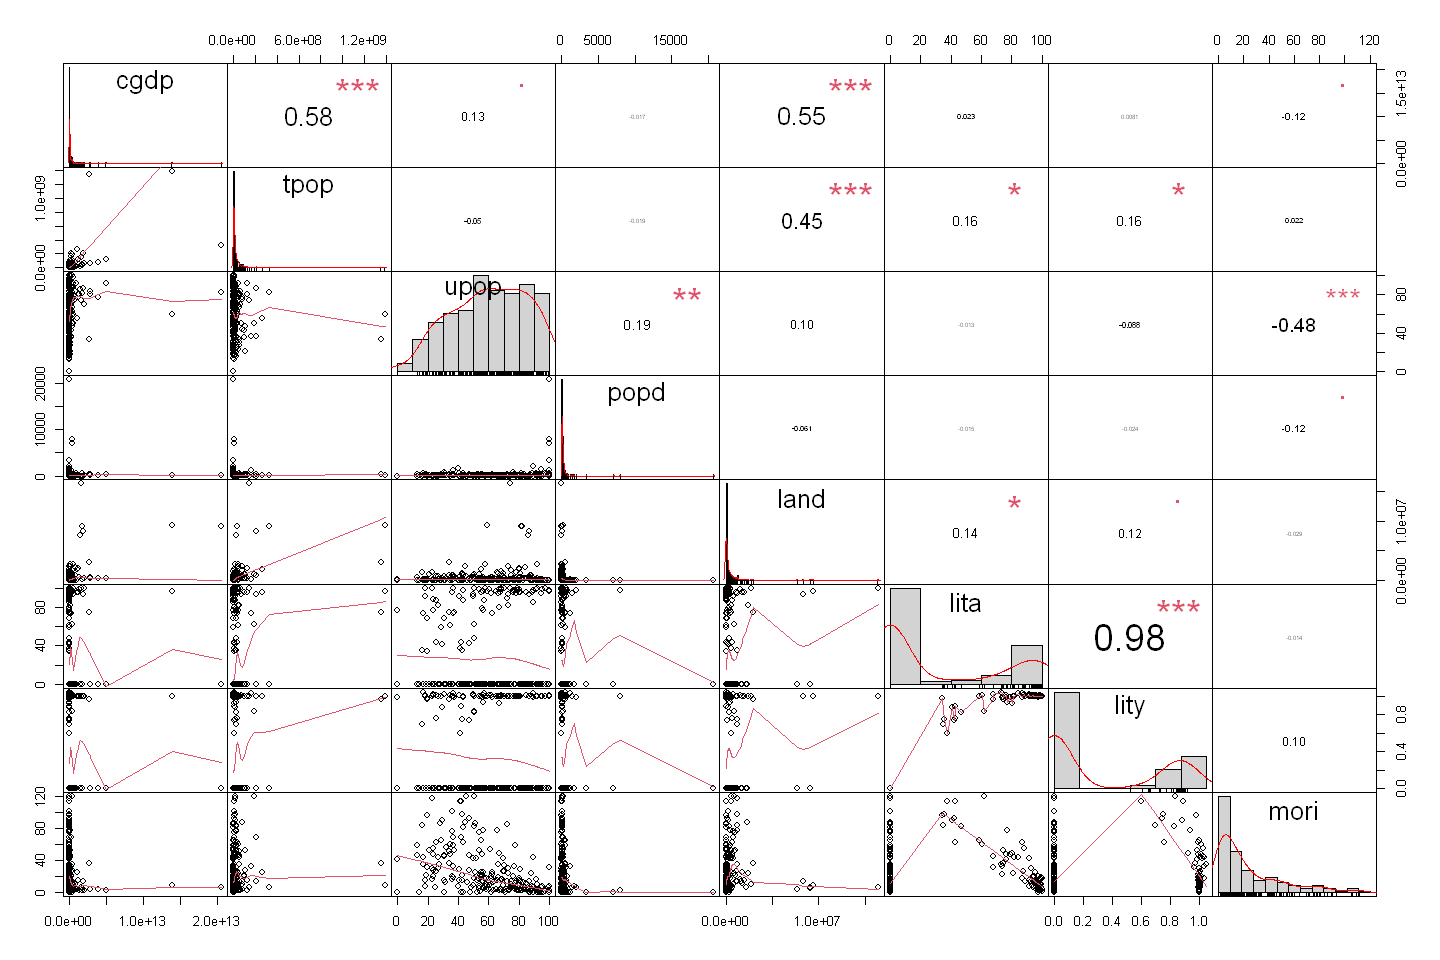

In [42]:
#Exploratory Data from World Bank 
chart.Correlation(df.wb[, 5:12], histogram=TRUE, pch=19 , tl.cex = .7 )

# Principal Component Analysis

[1] 5926.308

[1] 5.025048e-01 1.254461e-01 1.140321e-01 5.768301e-02 4.068095e-02
 [6] 3.657147e-02 2.633575e-02 1.705989e-02 1.661154e-02 1.547450e-02
[11] 1.016520e-02 8.024012e-03 7.499833e-03 5.733708e-03 4.386612e-03
[16] 3.438726e-03 2.791443e-03 2.103214e-03 1.316311e-03 9.849180e-04
[21] 5.462408e-04 1.929737e-04 1.801886e-04 1.330809e-04 7.098807e-05
[26] 2.877741e-05 2.078471e-06 1.604033e-06

[1] 5.025048e-01 1.254461e-01 1.140321e-01 5.768301e-02 4.068095e-02
 [6] 3.657147e-02 2.633575e-02 1.705989e-02 1.661154e-02 1.547450e-02
[11] 1.016520e-02 8.024012e-03 7.499833e-03 5.733708e-03 4.386612e-03
[16] 3.438726e-03 2.791443e-03 2.103214e-03 1.316311e-03 9.849180e-04
[21] 5.462408e-04 1.929737e-04 1.801886e-04 1.330809e-04 7.098807e-05
[26] 2.877741e-05 2.078471e-06 1.604033e-06

[1] 0.5025048 0.6279508 0.7419830 0.7996660 0.8403469 0.8769184 0.9032542
 [8] 0.9203141 0.9369256 0.9524001 0.9625653 0.9705893 0.9780891 0.9838228
[15] 0.9882095 0.9916482 0.9944396 0.9965428 0.9978592 0.9988441 0.9993903
[22] 0.9995833 0.9997635 0.9998966 0.9999675 0.9999963 0.9999984 1.0000000

imws       phom       pipy       ptap       bore       pwel       pspr 
81.0369863 18.3136986 11.5917808 12.0095890 13.4315068  6.7465753  3.3424658 
      rain       truc       ctan       bott       uiws       uwel       uspr 
 2.7424658  1.4493151  0.5465753  6.7164384 18.9000000  6.8917808  3.8890411 
      surw       othw       iwsp       basw       liws       watp       tles 
 5.2821918  0.4465753 46.3808219 69.3863014  5.5863014 49.3794521 33.0643836 
      tmor       bicy       cart       mcyc       pcar       boat       wigc 
 9.6767123 23.1397260  4.7315068 16.8356164 12.2136986  0.5712329  0.2123288

imws        phom        pipy        ptap        bore        pwel 
208.5723630 481.0892542 134.0429871 115.7822679 303.6227435  64.2428006 
       pspr        rain        truc        ctan        bott        uiws 
 50.7935883  60.7677549   9.0383676   1.3505784 200.5775038 207.4805556 
       uwel        uspr        surw        othw        iwsp        basw 
 65.0418760  47.7054338  23.8181507   0.6744673 884.8043493 634.8011986 
       liws        watp        tles        tmor        bicy        cart 
 41.4423097 916.8041553 479.8364916 111.2045890 306.9179833  71.6957991 
       mcyc        pcar        boat        wigc 
362.6837139 140.4350875   1.0595776   0.0222070

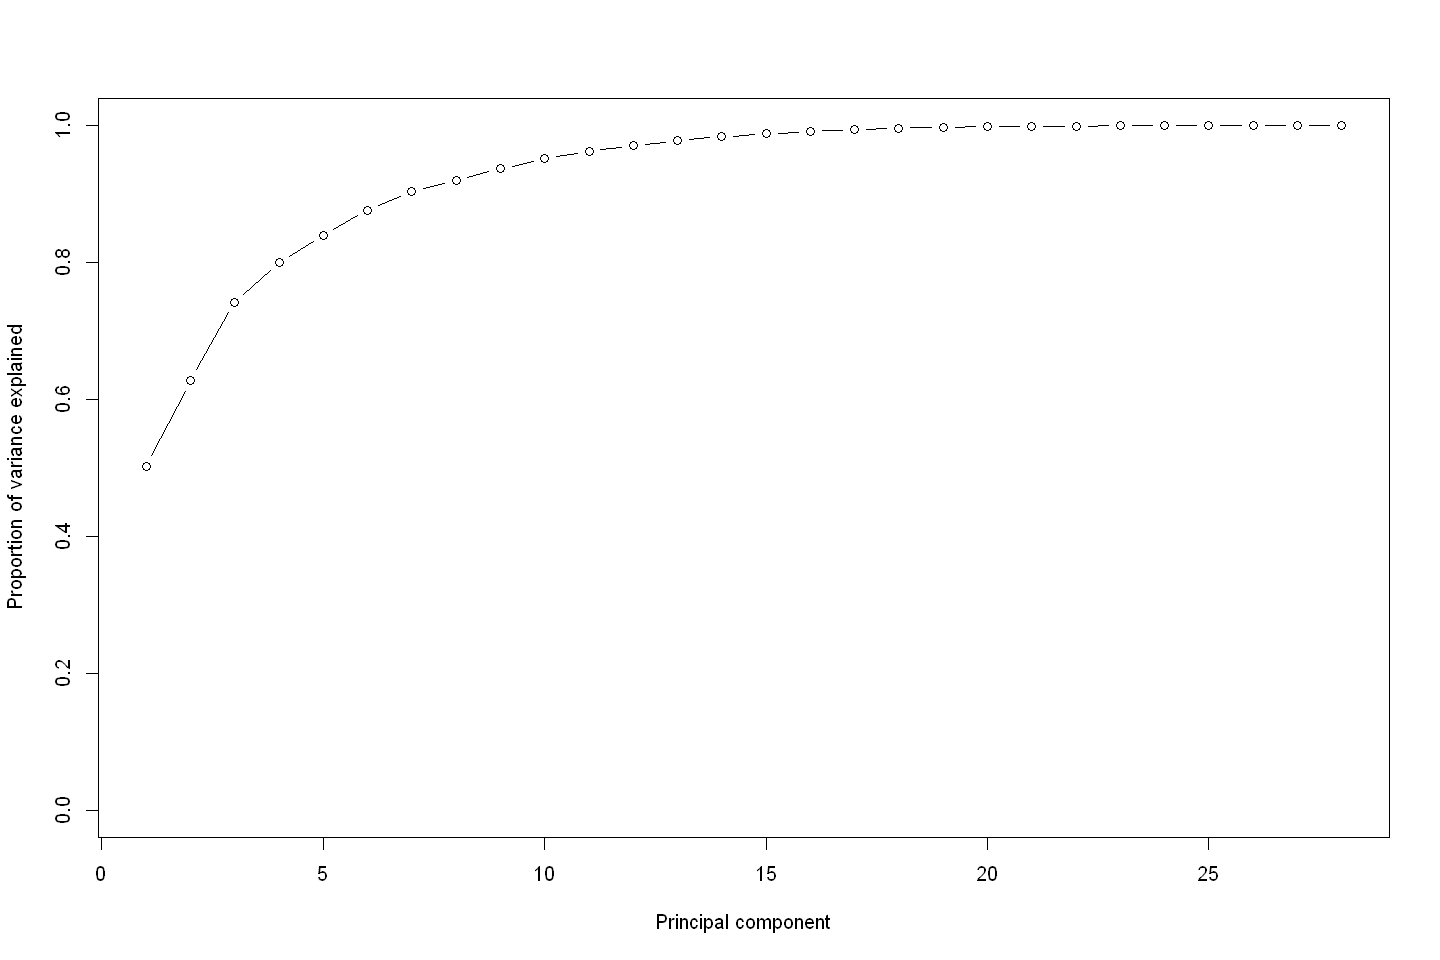

PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9 PC10 PC11 PC12 PC13 PC14 PC15 PC16 
   1    1    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
PC17 PC18 PC19 PC20 PC21 PC22 PC23 PC24 PC25 PC26 PC27 PC28 
   1    1    1    1    1    1    1    1    1    1    1    1

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
imws,0.270657994,-0.09928351,0.271491490,-0.015479175,0.035848471,-0.262369750,0.018738205,-0.16092761,0.126014154,0.121464665,...,-0.04122439,-0.108403916,0.099960163,0.105754997,-0.25278590,-0.230485883,0.002992392,0.0354009117,6.804118e-02,0.7011633384
phom,0.242066665,-0.10966126,-0.121273908,0.242873523,-0.064687782,-0.125645587,-0.165373025,0.14209848,-0.013954080,-0.394603635,...,-0.14453770,-0.016401244,-0.104539924,0.147729951,-0.09967875,0.554388330,0.022688754,0.0673365580,-4.169183e-02,0.0099477783
pipy,0.067083829,-0.10760454,-0.044512523,0.125839835,0.514990219,0.301616445,-0.007518394,-0.30963410,-0.130012078,0.213695286,...,0.22496968,-0.011284492,0.135940003,0.296832675,-0.21310279,0.282959287,0.003847710,0.0107697535,-2.581770e-02,0.0080262749
ptap,-0.167090867,-0.24265111,0.088988989,0.061665614,0.383052223,-0.007007197,0.153336572,-0.21299312,0.104600886,0.048352416,...,-0.05707884,-0.079913765,-0.061105838,-0.494618881,-0.01043358,0.230792972,0.017123029,0.0454698474,1.414357e-02,0.0020101695
bore,-0.085480698,0.10485730,0.466890583,-0.077453433,-0.133889280,0.043374084,-0.193570437,0.25473495,0.200824134,0.254907301,...,0.12088540,0.003360308,0.010752258,-0.286595807,-0.21117550,0.414153295,-0.008770589,0.0471810866,-7.714767e-03,0.0064192179
pwel,-0.134432283,0.08515405,0.035549777,0.314352329,-0.312849140,-0.173679149,-0.029526888,-0.33460716,0.145151958,0.099380968,...,0.07558423,0.218787742,-0.123652911,-0.087899567,0.04660874,0.192549497,0.003957335,-0.0044045640,-1.194831e-02,0.0025169059
pspr,-0.109698714,-0.17543208,-0.115081689,-0.321666969,0.083801394,-0.364658043,0.061497888,-0.13535106,-0.188862952,-0.002016928,...,0.18001023,-0.012005637,0.051727968,-0.137329550,-0.05850272,0.130820431,-0.048920875,0.0182592907,7.760793e-05,0.0019734871
rain,0.064944600,0.33957377,-0.168880440,-0.238496308,0.176444269,-0.073444430,0.195205531,0.05288390,0.185246989,0.036795050,...,0.23009081,-0.306165479,0.145269783,0.089378456,0.33051597,0.233209681,-0.004681615,-0.0330347579,-1.121328e-02,0.0055417618
truc,0.056155639,-0.10948673,-0.194734378,0.201654022,-0.191288247,0.029857538,0.361474010,0.37481664,-0.127186365,0.539057362,...,-0.14381927,-0.177593864,0.118371394,0.108217650,-0.12105920,0.129551723,0.040756563,-0.0072775769,1.519349e-02,-0.0004510444
ctan,0.008938326,0.05424020,-0.043158192,-0.081247413,-0.383612788,0.217717347,0.330237239,-0.53308500,-0.035118654,0.132768639,...,-0.06937903,-0.160834187,-0.230342089,-0.074878643,0.09047461,0.031838785,-0.011448525,0.0093582031,5.119027e-03,0.0001905687


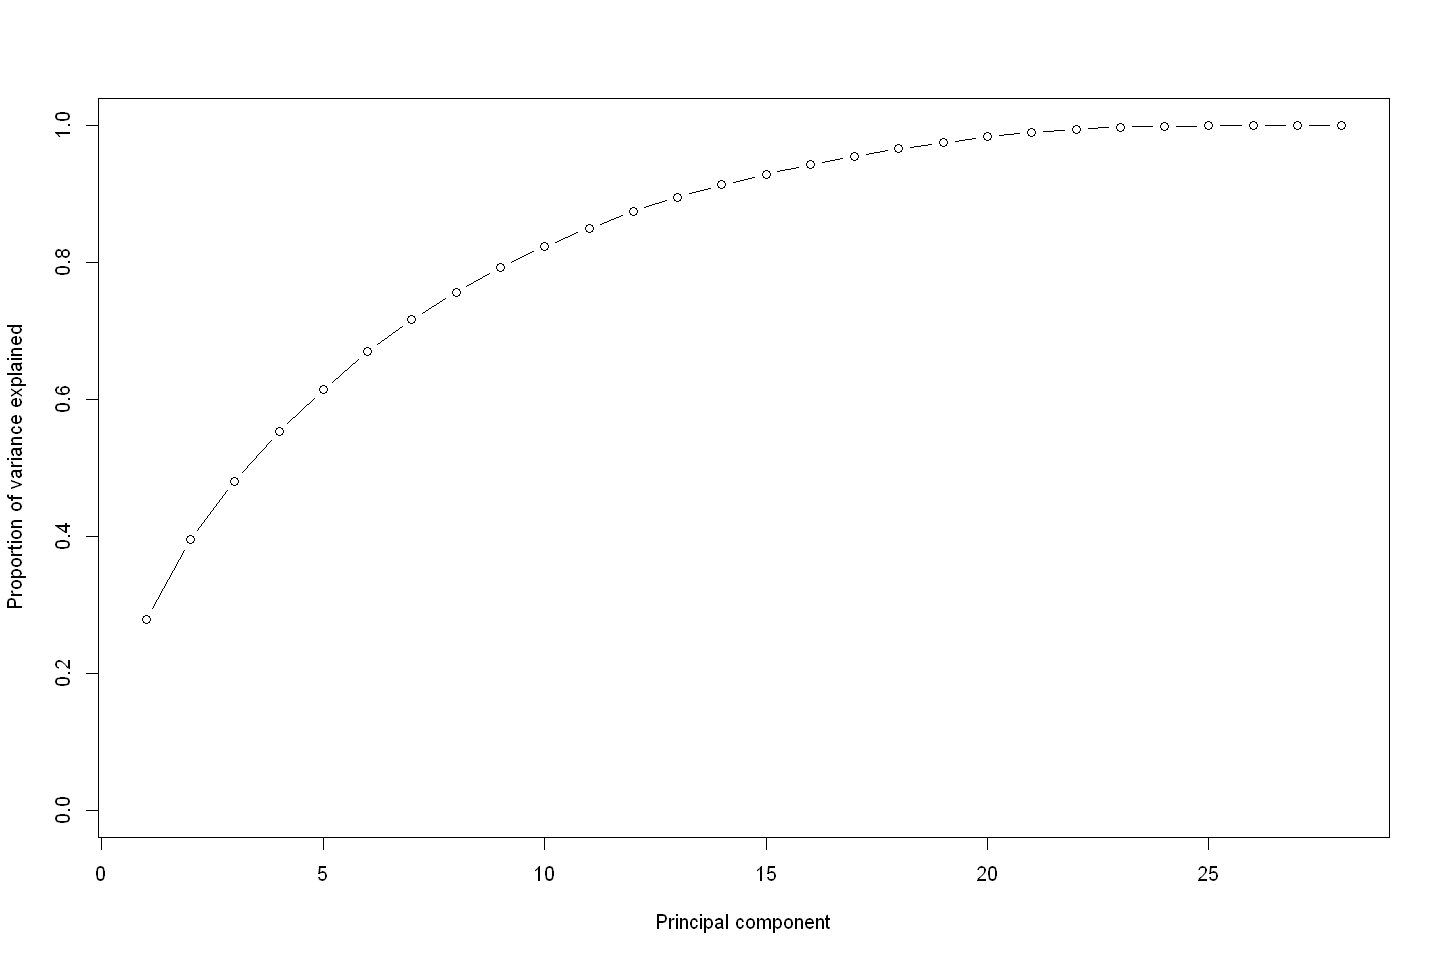

In [43]:
# PCA Scree plot without standardizing data
hpca_dfsimple <- prcomp(my_data, scale=FALSE) # Scale to 0 to 1 # We can extract the information summarized above (and much more) # from the attributes of the object hpca_dfsimple

standard_deviation_of_each_component <- hpca_dfsimple$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_tot
var_per_dim/var_tot

var_prop <- var_per_dim / sum(var_per_dim)
var_prop

cum_var <- cumsum(var_prop)
cum_var
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
apply(my_data, 2, mean)
apply(my_data, 2, var)
hpca_cor <- prcomp(my_data, scale=TRUE) #Using the correlation matrix to obtain the eigenvalue #Single decomposition of the variance matrix.
standard_deviation_of_each_component <- hpca_cor$sdev
var_per_dim <- standard_deviation_of_each_component^2
var_tot <- sum(var_per_dim)
var_prop <- var_per_dim / sum(var_per_dim)
cum_var <- cumsum(var_prop)
plot(cum_var,xlab="Principal component", 
     ylab="Proportion of variance explained", ylim=c(0,1), type='b')
eigenvectors <- hpca_cor$rotation
col.norm(eigenvectors)
eigenvectors

PC_contr <- eigenvectors[,c("PC1")] # Let us plot the contribution of the original dimension to the 1st PCA # PC_contr
ord <- order( -abs(PC_contr) )# We order by the magnitude of the contribution # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord] #PC_contr

Loading Bars for 12 Dimensions# 

iwsp       watp       tles       uiws       tmor       imws       pcar 
 0.3146811  0.3079801 -0.2850617 -0.2717328 -0.2706865  0.2706580  0.2433803

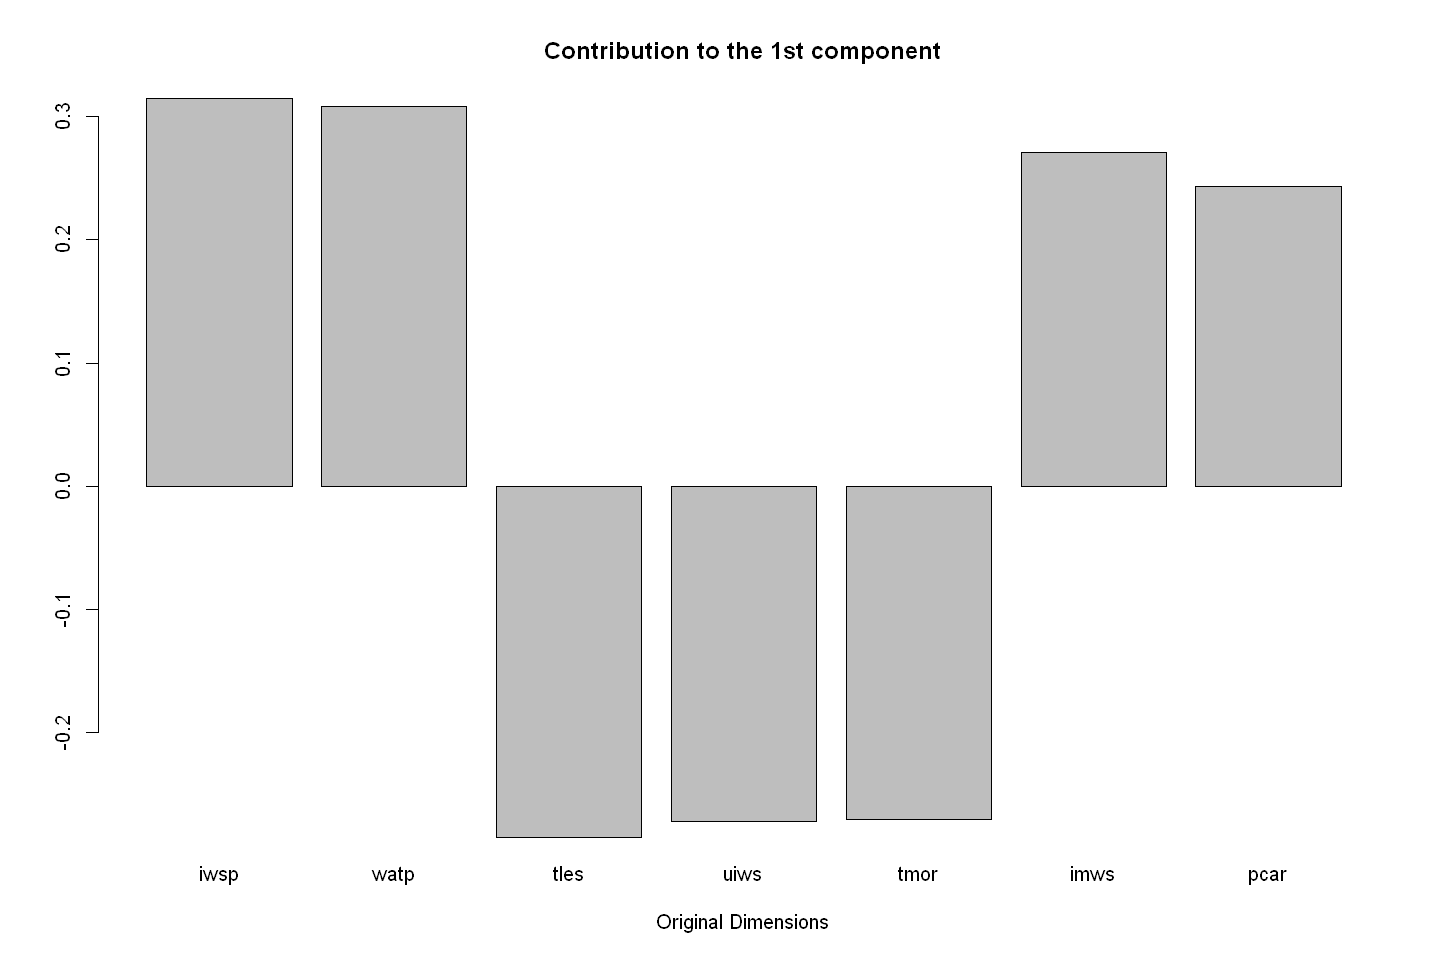

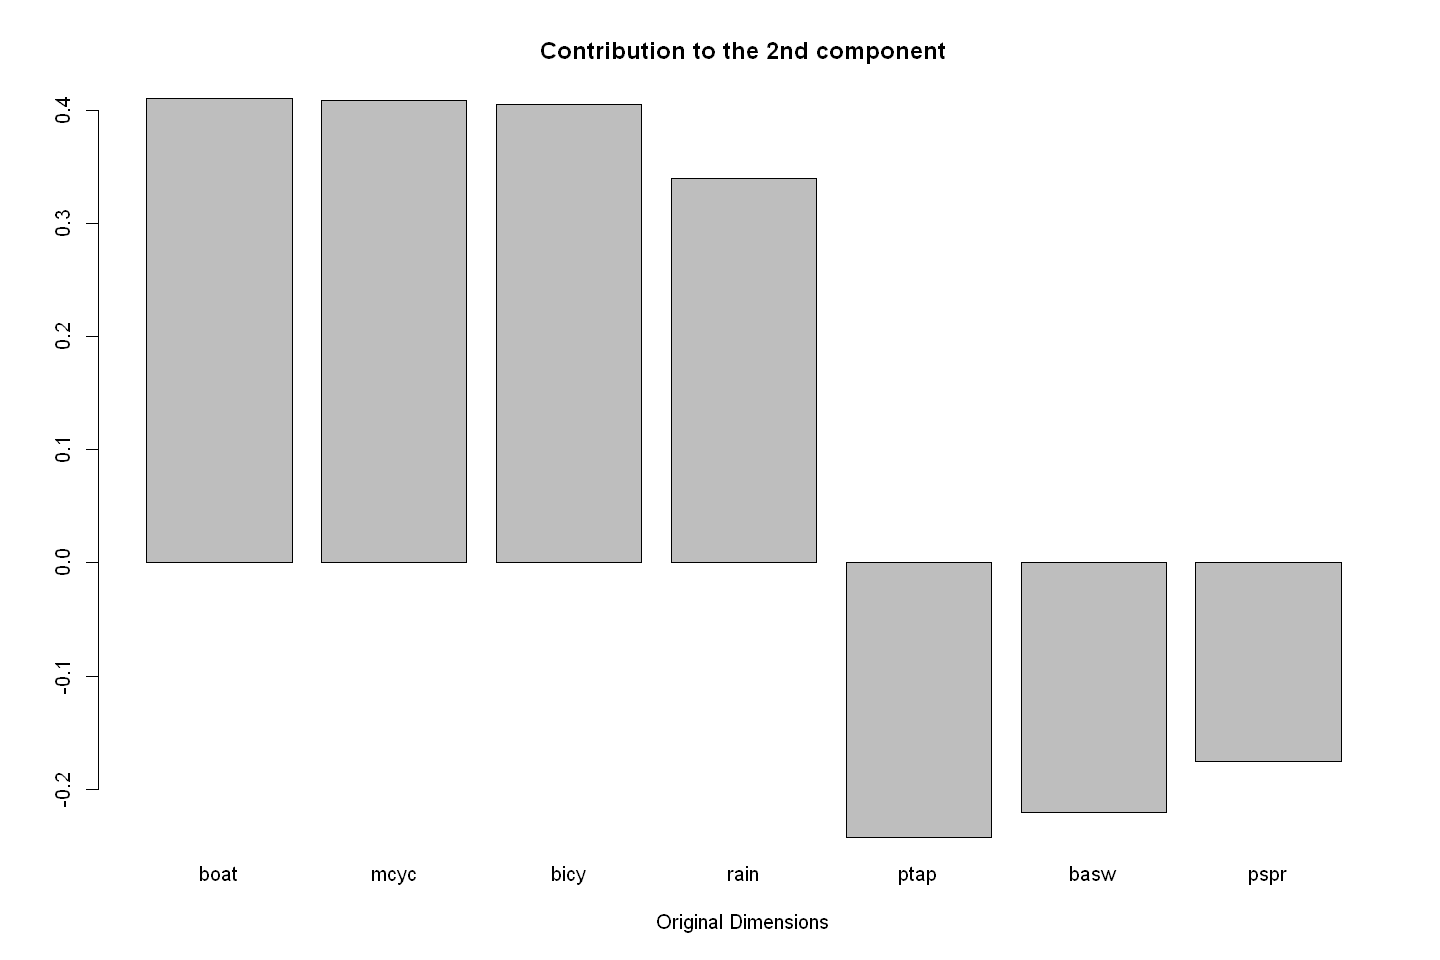

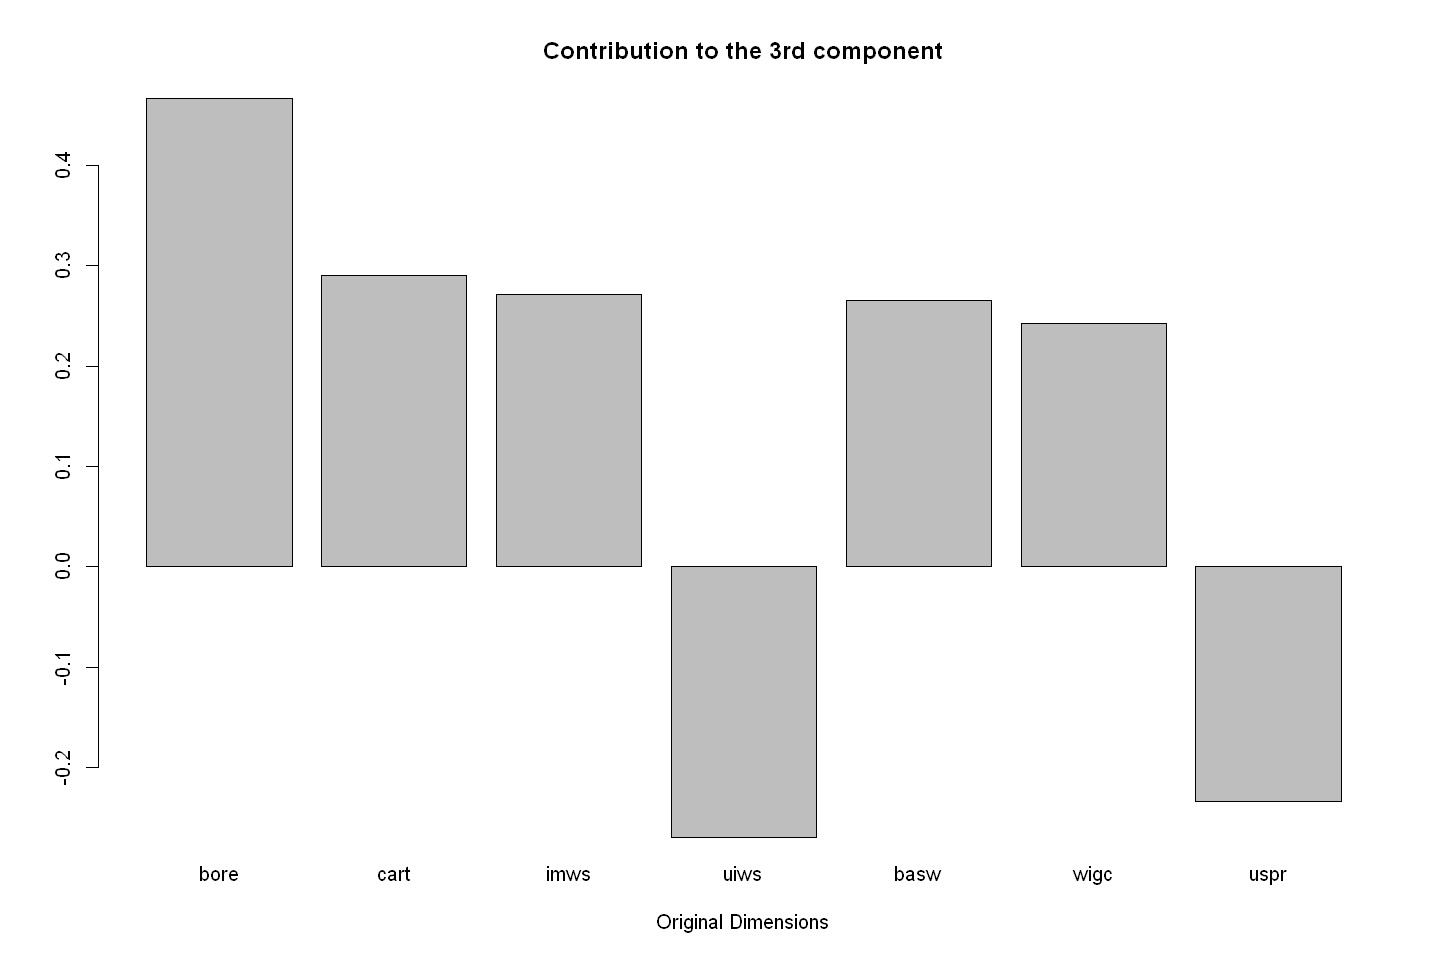

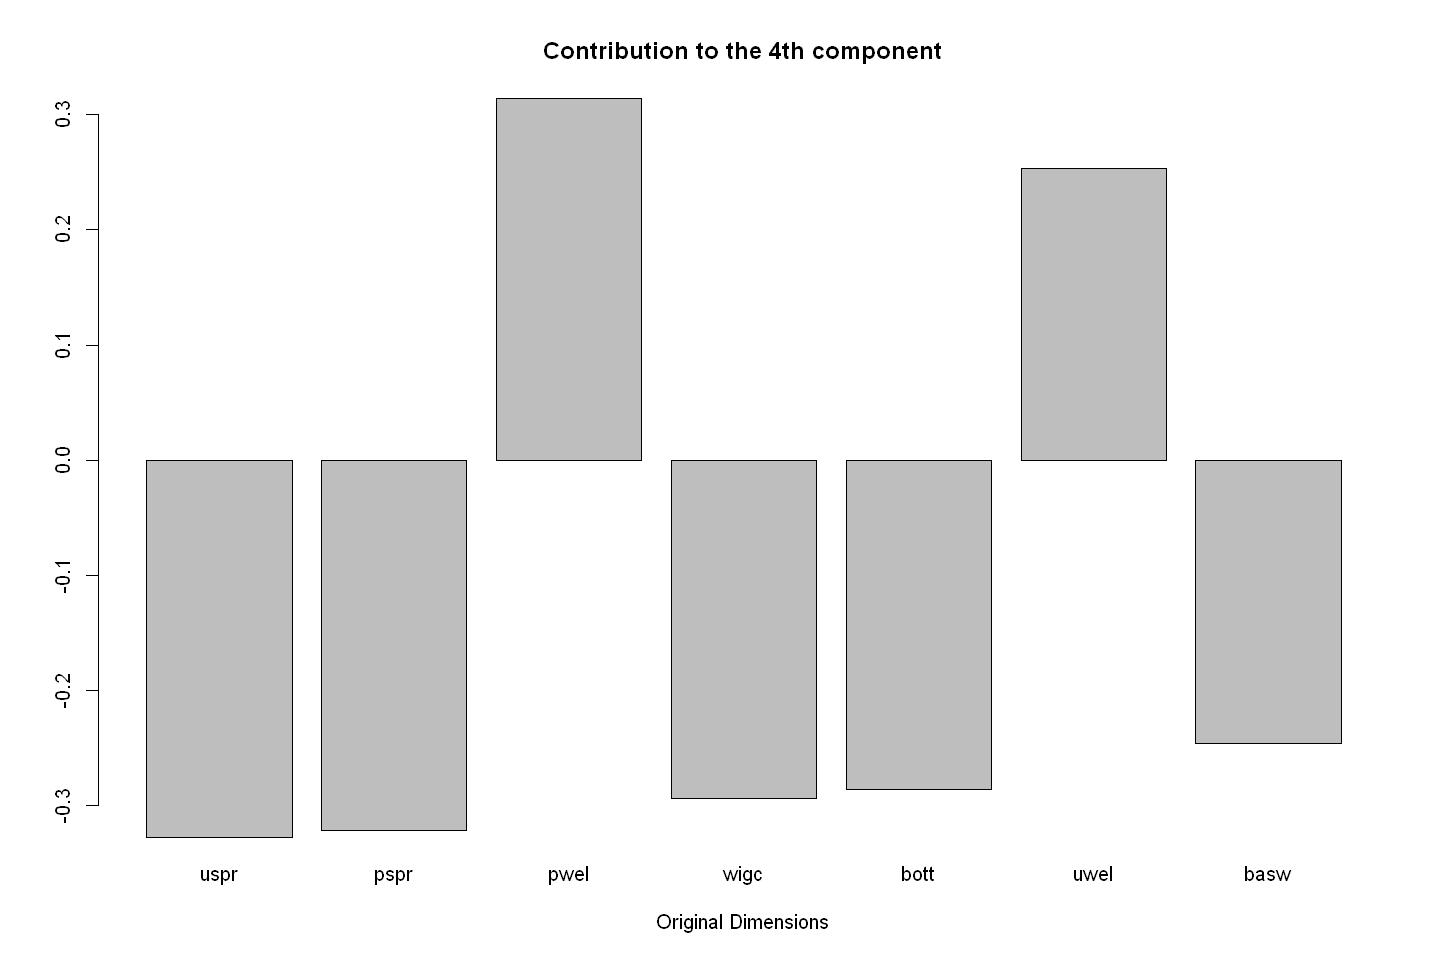

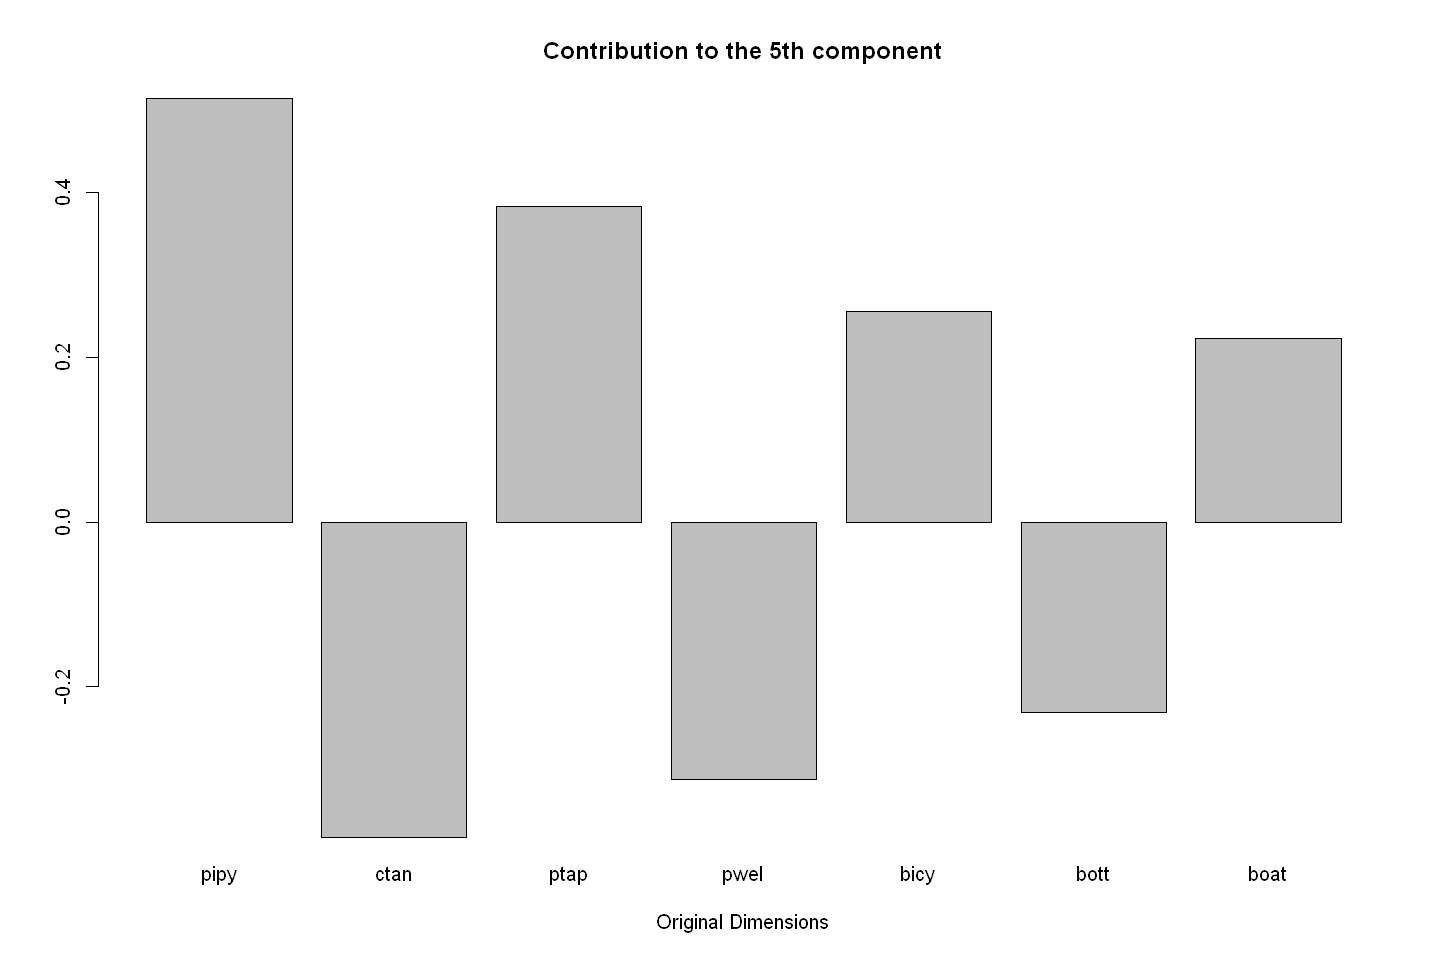

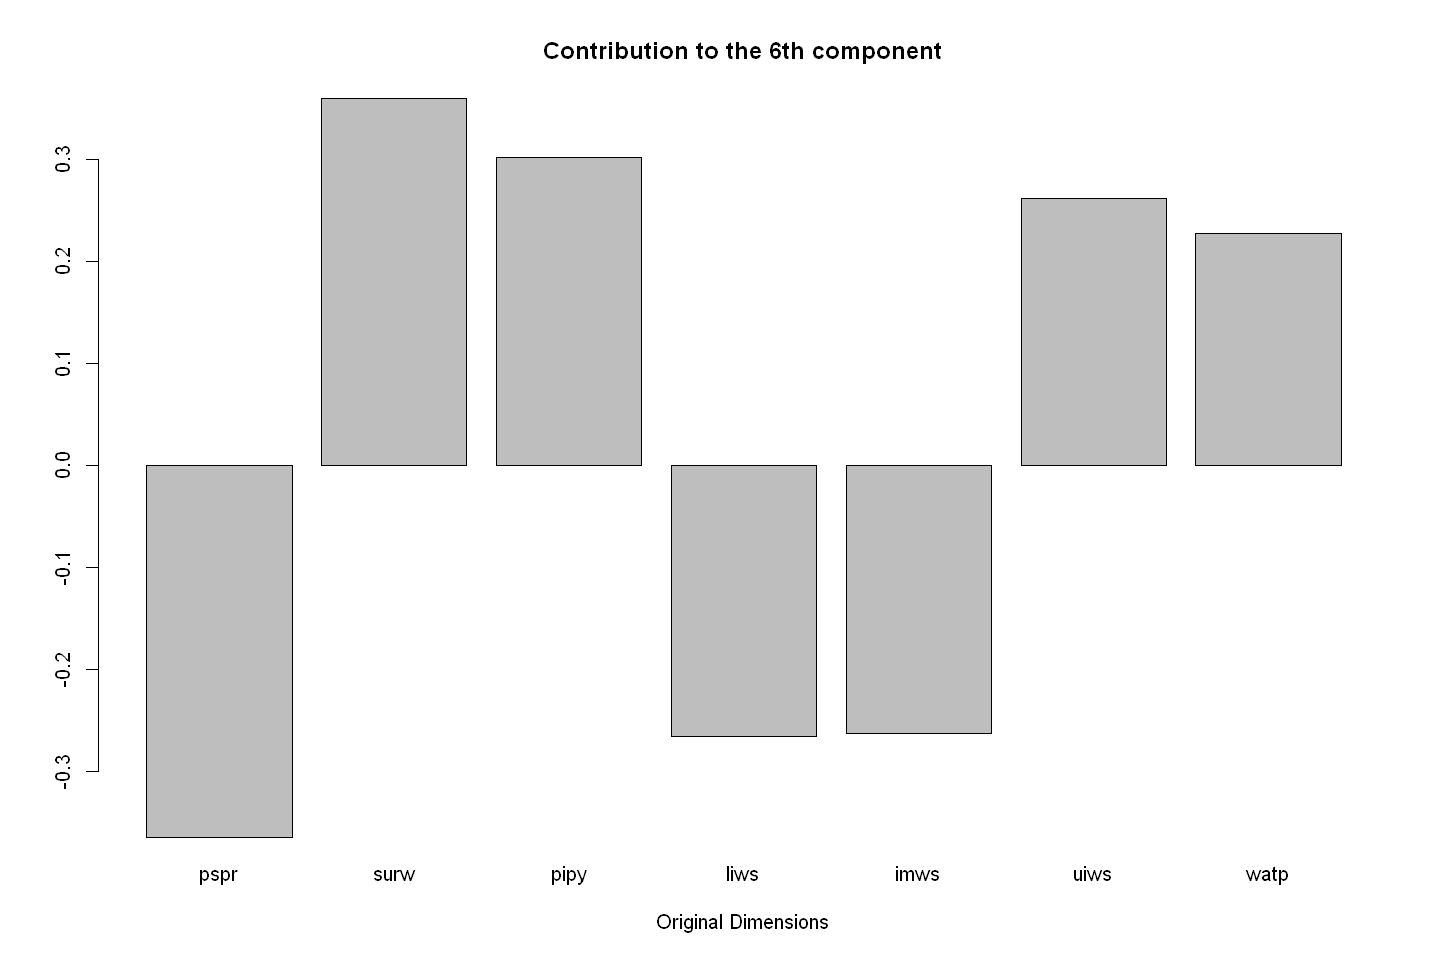

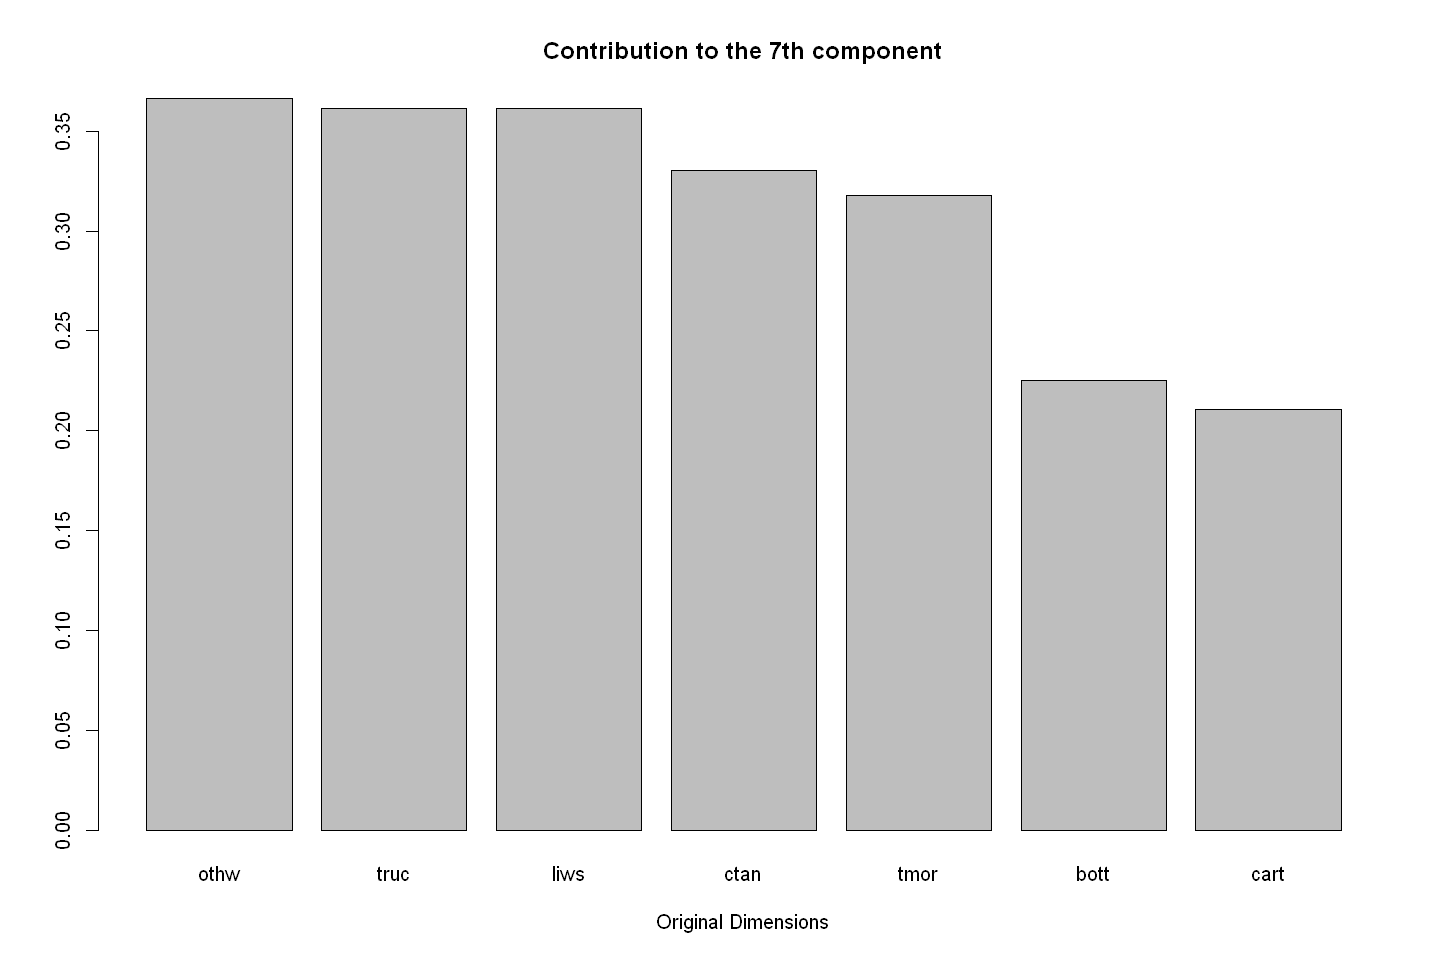

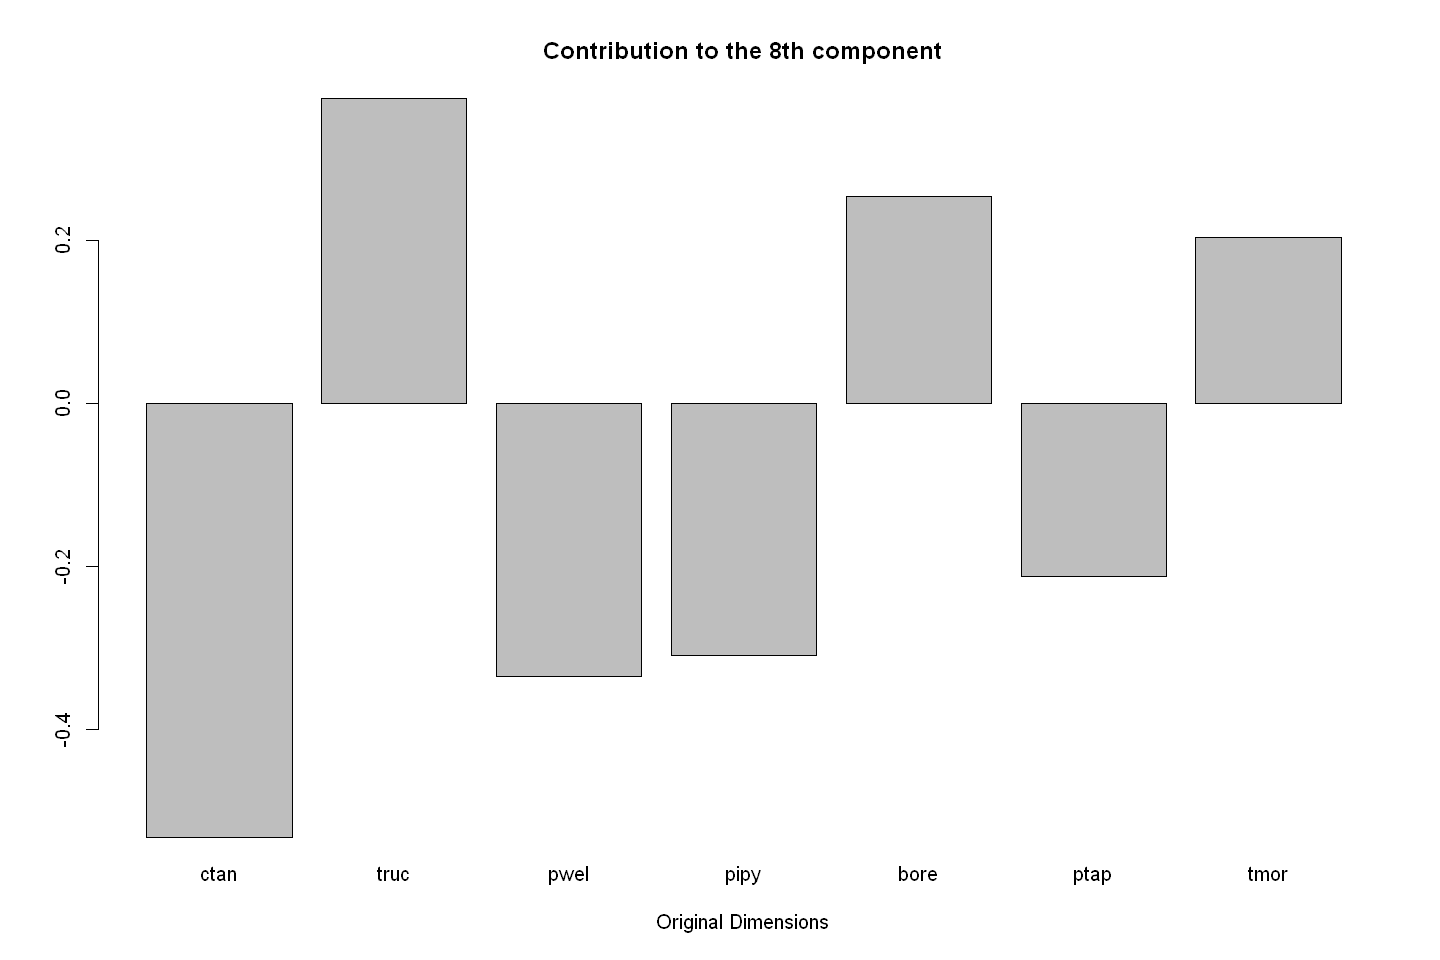

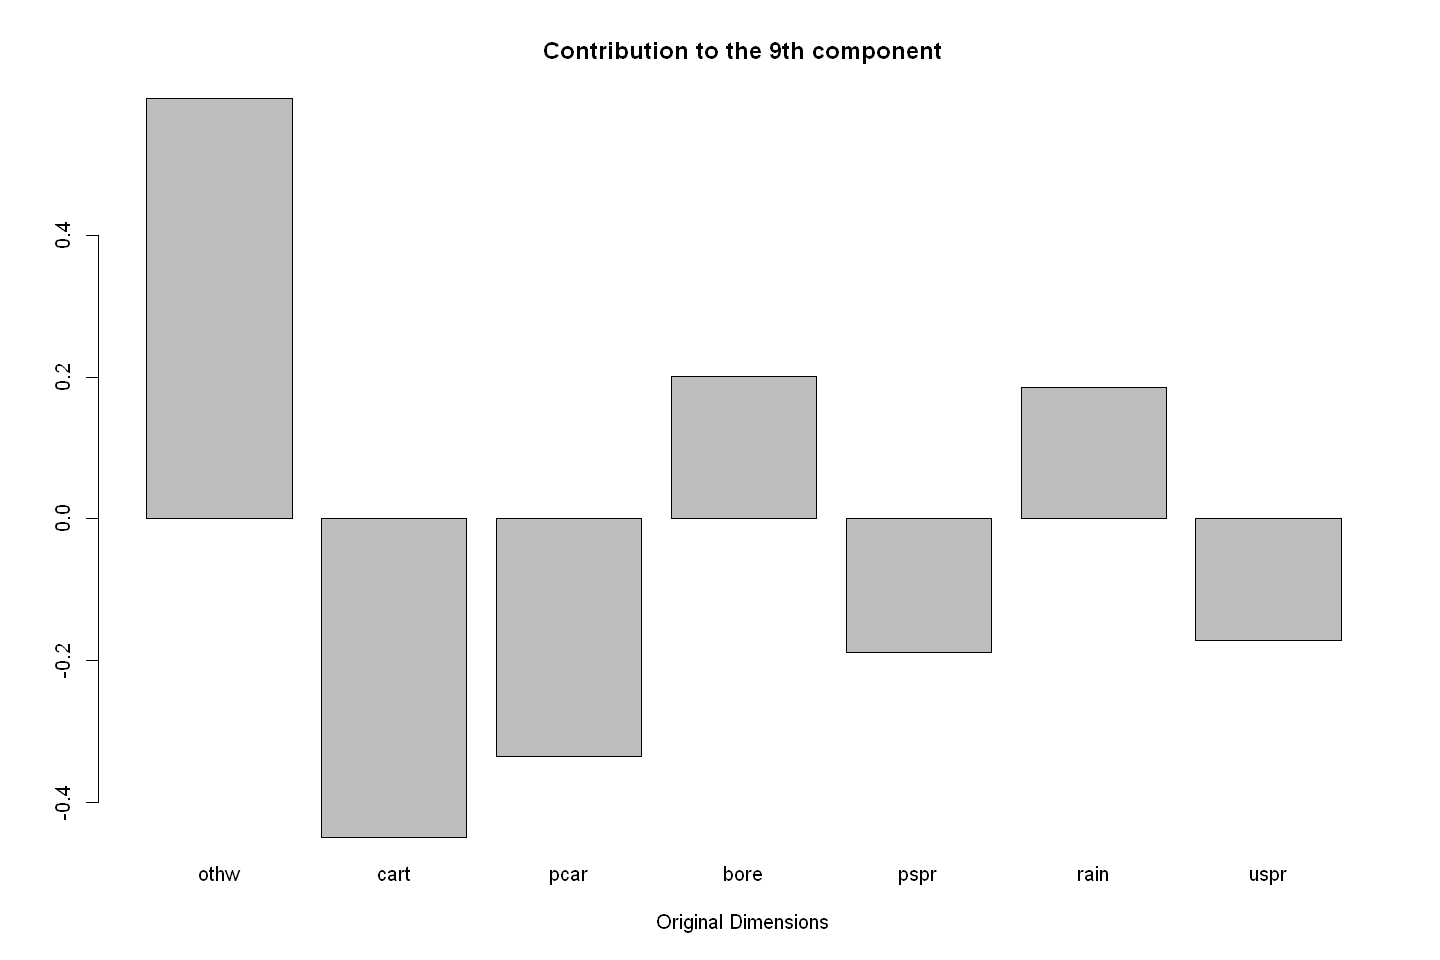

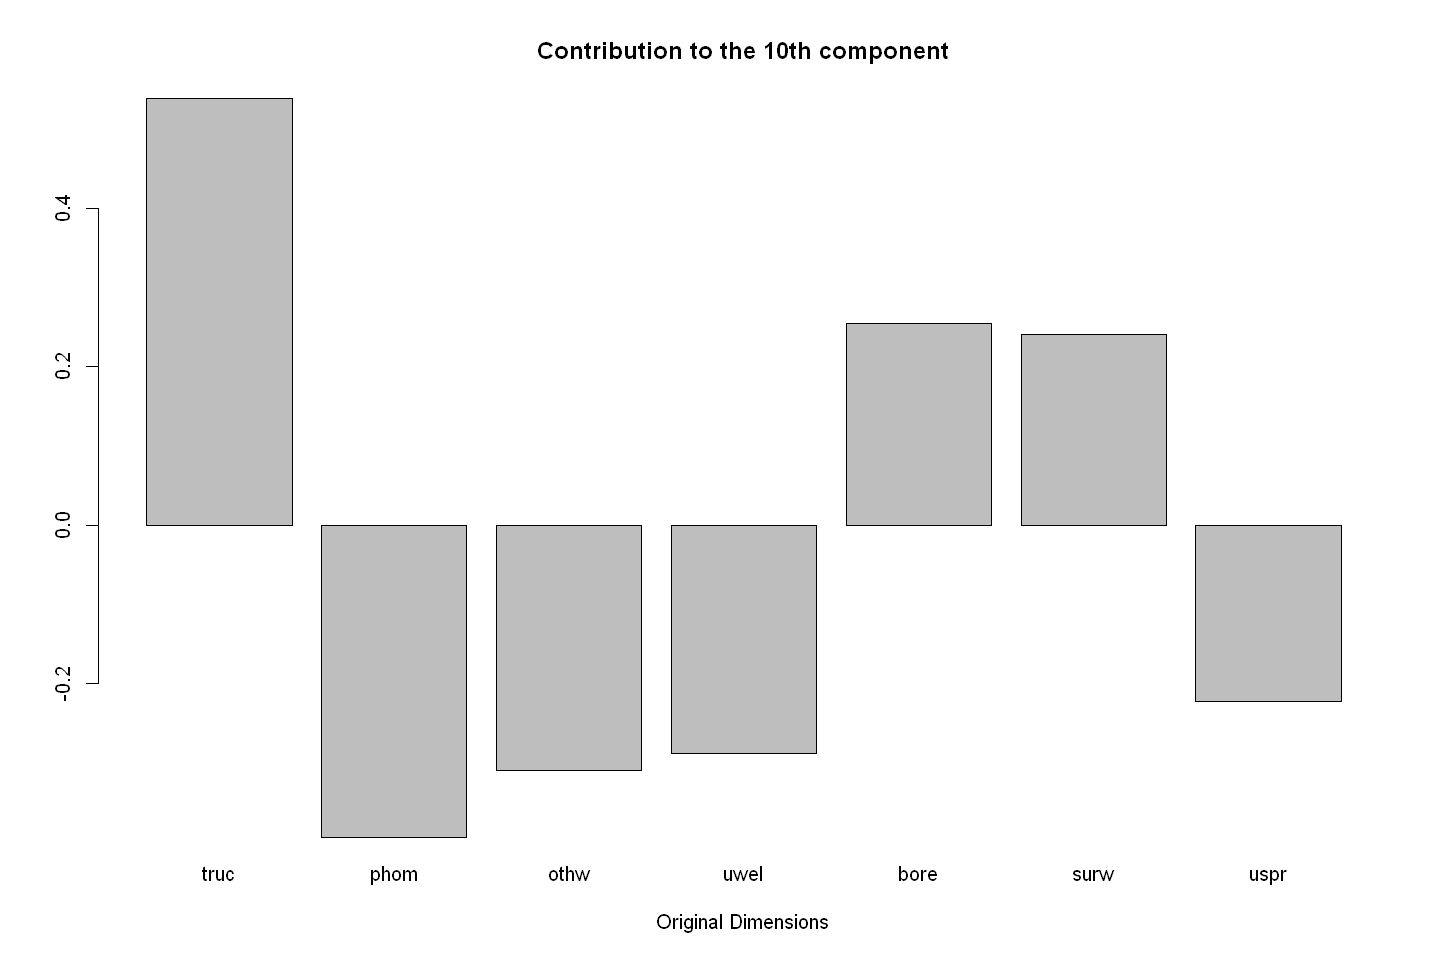

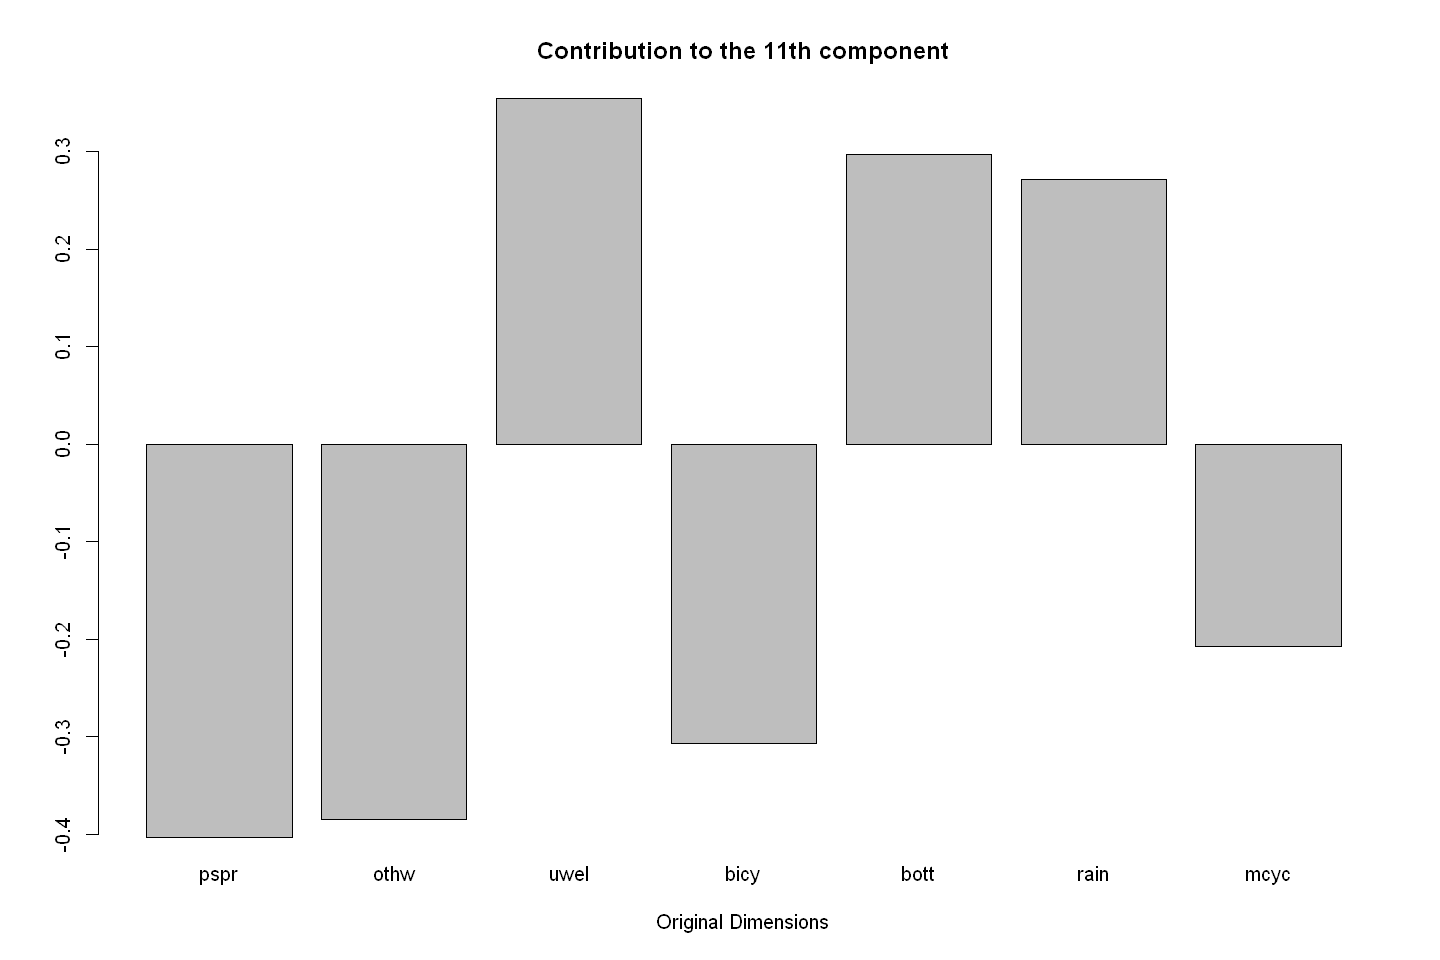

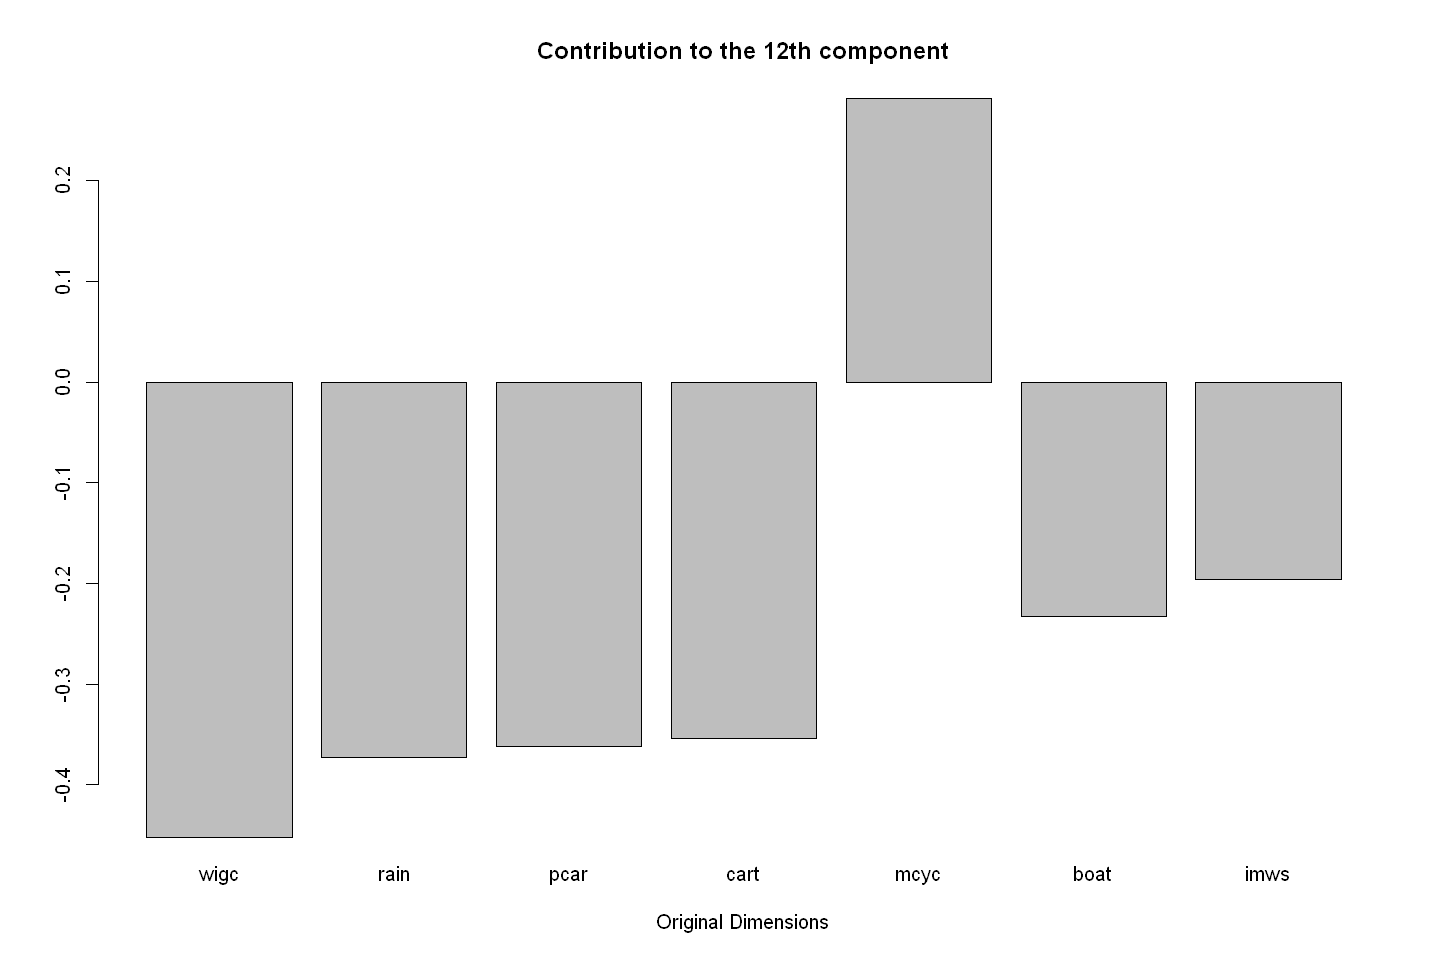

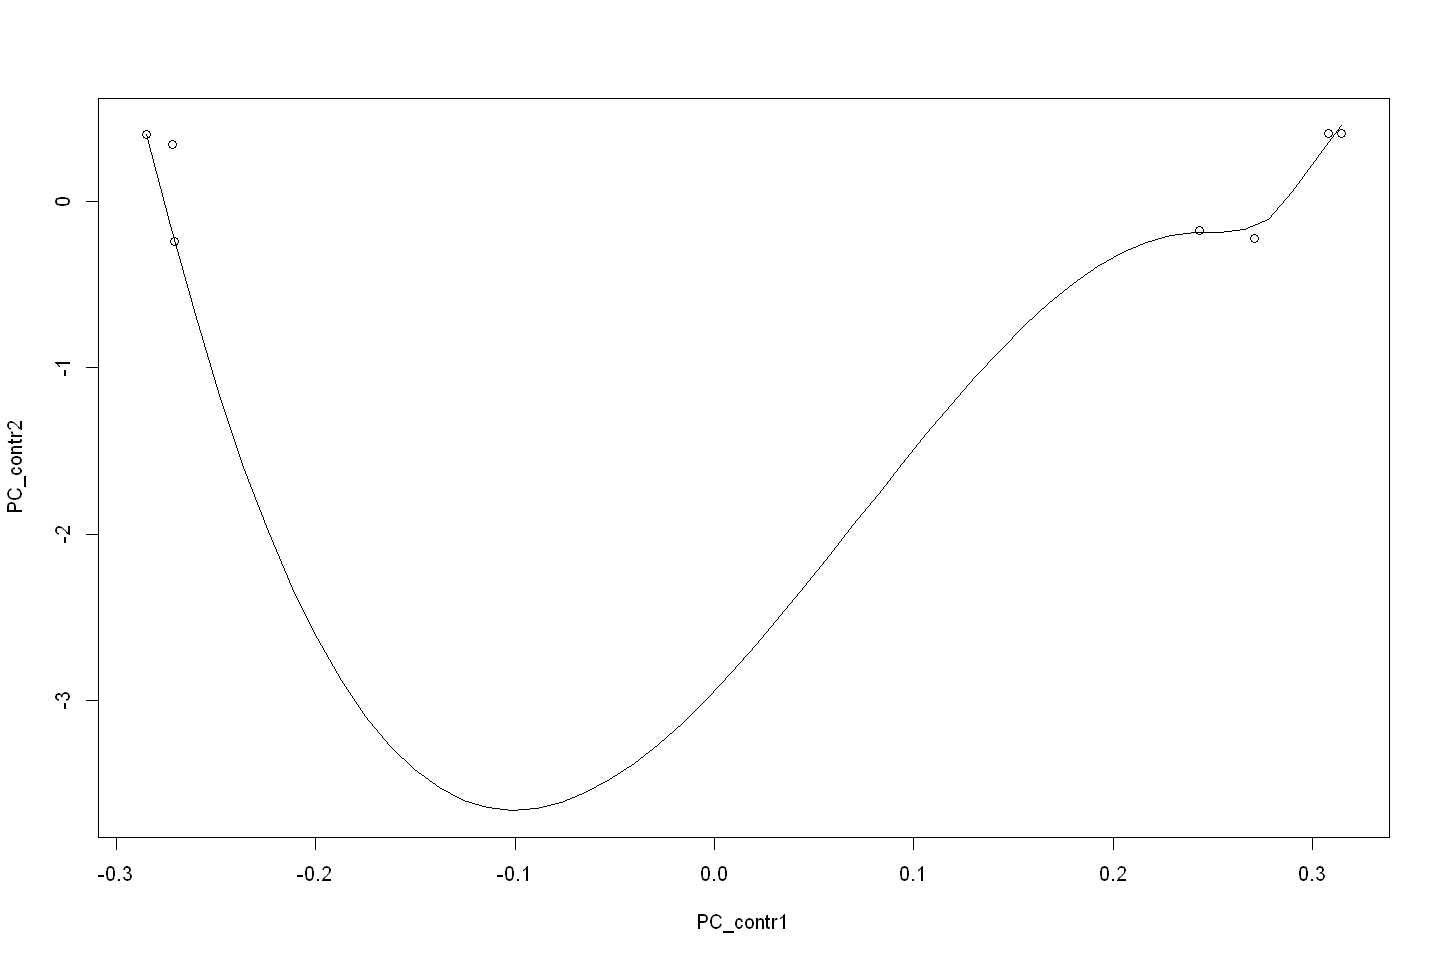

In [44]:
PC_contr1 <- PC_contr[1:7] # We just select the 7 highest contributing dimensions (highest loading)
PC_contr1
barplot(PC_contr1, main="Contribution to the 1st component", xlab="Original Dimensions") 

# Second principal component vector
PC_contr <- eigenvectors[,c("PC2")] # We order by the magnitude of the contribution
ord <- order( -abs(PC_contr) ) # We use the - sign because we want a descending order
PC_contr <- PC_contr[ord]
PC_contr2 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr2, main="Contribution to the 2nd component",xlab="Original Dimensions") 
# Third principal component vector
PC_contr <- eigenvectors[,c("PC3")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr3 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr3, main="Contribution to the 3rd component",xlab="Original Dimensions") 
# 4 principal component vector
PC_contr <- eigenvectors[,c("PC4")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr4 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr4, main="Contribution to the 4th component",xlab="Original Dimensions") 
# 5 principal component vector
PC_contr <- eigenvectors[,c("PC5")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr5 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr5, main="Contribution to the 5th component",xlab="Original Dimensions") 
# 6 principal component vector
PC_contr <- eigenvectors[,c("PC6")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr6 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr6, main="Contribution to the 6th component",xlab="Original Dimensions") 
# 7 principal component vector
PC_contr <- eigenvectors[,c("PC7")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr7 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr7, main="Contribution to the 7th component",xlab="Original Dimensions") 
# 8 principal component vector
PC_contr <- eigenvectors[,c("PC8")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr8 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr8, main="Contribution to the 8th component",xlab="Original Dimensions") 
# 9 principal component vector
PC_contr <- eigenvectors[,c("PC9")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr9 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr9, main="Contribution to the 9th component",xlab="Original Dimensions") 
# 10 principal component vector
PC_contr <- eigenvectors[,c("PC10")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr10 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr10, main="Contribution to the 10th component",xlab="Original Dimensions") 
# 11 principal component vector
PC_contr <- eigenvectors[,c("PC11")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr11 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr11, main="Contribution to the 11th component",xlab="Original Dimensions") 
# 12 principal component vector
PC_contr <- eigenvectors[,c("PC12")]
ord <- order( -abs(PC_contr) )
PC_contr <- PC_contr[ord]
PC_contr12 <- PC_contr[1:7]
options(repr.plot.width=12, repr.plot.height=8)
barplot(PC_contr12, main="Contribution to the 12th component",xlab="Original Dimensions")
scatter.smooth(PC_contr1,PC_contr2)

# Basics PCA with Color Visualization

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 73 individuals, described by 28 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,7.8025275633,2.786617e+01,27.86617
Dim.2,3.2681821121,1.167208e+01,39.53825
Dim.3,2.3971016434,8.561077e+00,48.09933
Dim.4,2.0102955921,7.179627e+00,55.27895
Dim.5,1.7146999441,6.123928e+00,61.40288
Dim.6,1.5544796186,5.551713e+00,66.95459
Dim.7,1.3332448204,4.761589e+00,71.71618
Dim.8,1.1183712948,3.994183e+00,75.71037
Dim.9,1.0012335321,3.575834e+00,79.28620
Dim.10,0.8536654878,3.048805e+00,82.33501


Principal Component Analysis Results for variables
  Name       Description                                    
1 "$coord"   "Coordinates for the variables"                
2 "$cor"     "Correlations between variables and dimensions"
3 "$cos2"    "Cos2 for the variables"                       
4 "$contrib" "contributions of the variables"               

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,-0.75602910,-0.17948586,0.42033877,0.02194713,0.04694234
phom,-0.67616493,-0.19824688,-0.18776325,-0.34435797,-0.08470642
pipy,-0.18738529,-0.19452871,-0.06891685,-0.17842188,0.67436193
ptap,0.46673500,-0.43866745,0.13777788,-0.08743253,0.50159368
bore,0.23877328,0.18956223,0.72286690,0.10981727,-0.17532340
pwel,0.37550976,0.15394247,0.05504021,-0.44570411,-0.40966516
pspr,0.30642147,-0.31714811,-0.17817610,0.45607517,0.10973504
rain,-0.18140978,0.61388534,-0.26147043,0.33815173,0.23104769
truc,-0.15685957,-0.19793136,-0.30149898,-0.28591494,-0.25048536
ctan,-0.02496743,0.09805605,-0.06682000,0.11519656,-0.50232772


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,0.5715800065,0.0322151731,0.1766846784,0.0004816766,2.203583e-03
phom,0.4571990153,0.0393018248,0.0352550386,0.1185824082,7.175178e-03
pipy,0.0351132476,0.0378414198,0.0047495327,0.0318343658,4.547640e-01
ptap,0.2178415594,0.1924291311,0.0189827440,0.0076444465,2.515962e-01
bore,0.0570126772,0.0359338391,0.5225365570,0.0120598321,3.073829e-02
pwel,0.1410075808,0.0236982835,0.0030294251,0.1986521564,1.678255e-01
pspr,0.0938941182,0.1005829234,0.0317467232,0.2080045586,1.204178e-02
rain,0.0329095093,0.3768552084,0.0683667844,0.1143465959,5.338303e-02
truc,0.0246049261,0.0391768213,0.0909016373,0.0817473530,6.274292e-02
ctan,0.0006233726,0.0096149893,0.0044649122,0.0132702470,2.523331e-01


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
imws,7.325574974,0.9857215,7.370762893,0.023960485,0.128511288
phom,5.859627045,1.2025592,1.470736074,5.898754824,0.418450915
pipy,0.450024013,1.1578737,0.198136473,1.583566414,26.521492554
ptap,2.791935787,5.8879562,0.791904008,0.380264800,14.672900551
bore,0.730694980,1.0995054,21.798681691,0.599903425,1.792633925
pwel,1.807203879,0.7251213,0.126378667,9.881738647,9.787458453
pspr,1.203380795,3.0776413,1.324379520,10.346963872,0.702267359
rain,0.421780110,11.5310345,2.852060303,5.688048878,3.113258004
truc,0.315345584,1.1987343,3.792147801,4.066434473,3.659119340
ctan,0.007989368,0.2941999,0.186262950,0.660114218,14.715877106


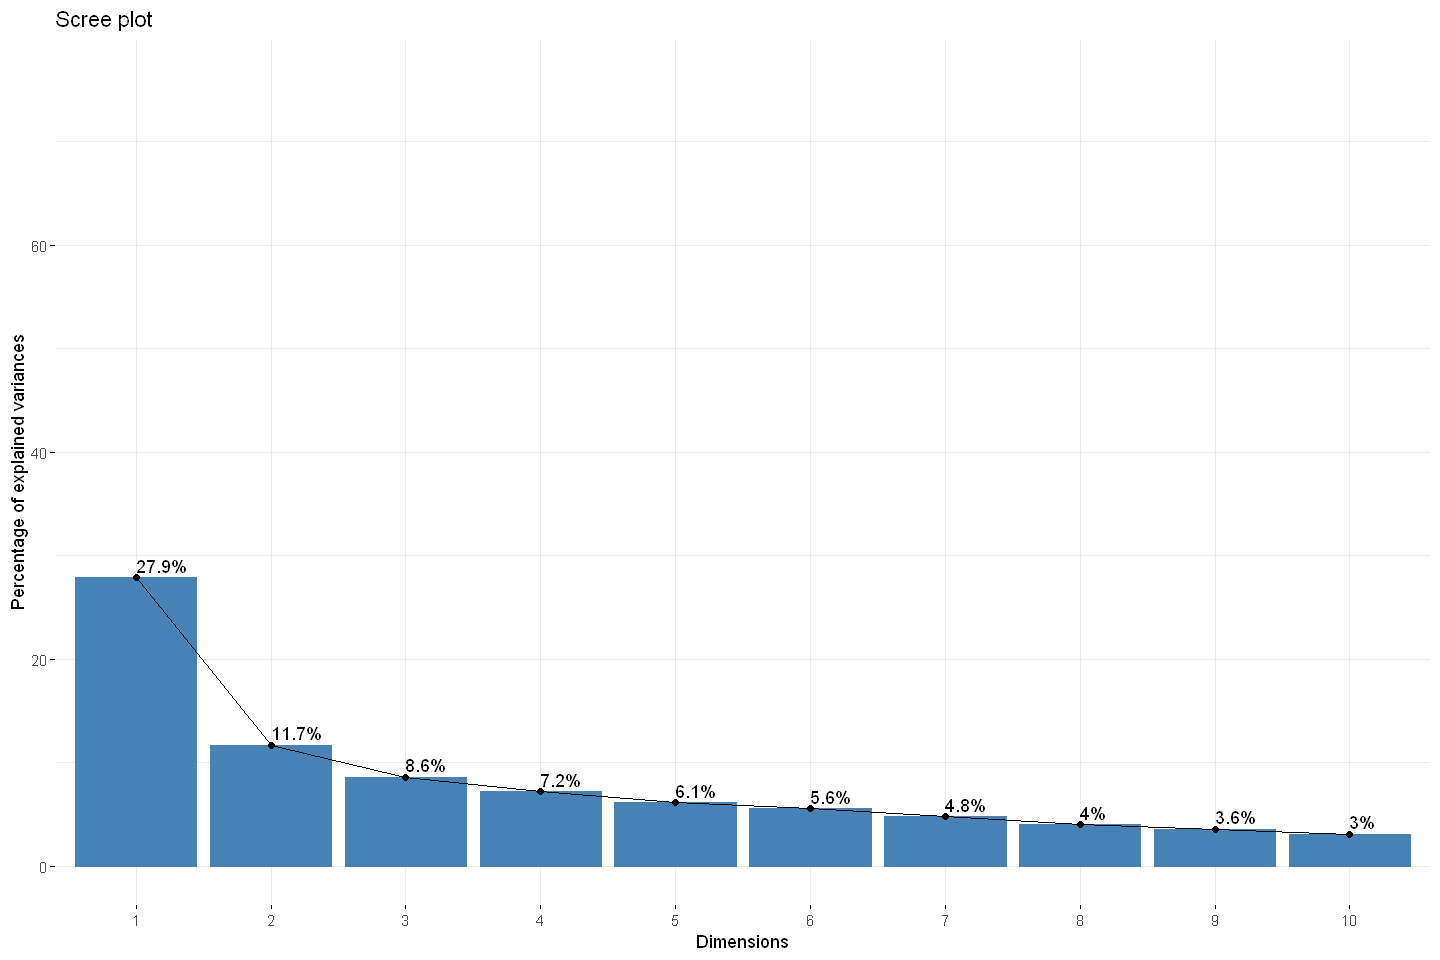

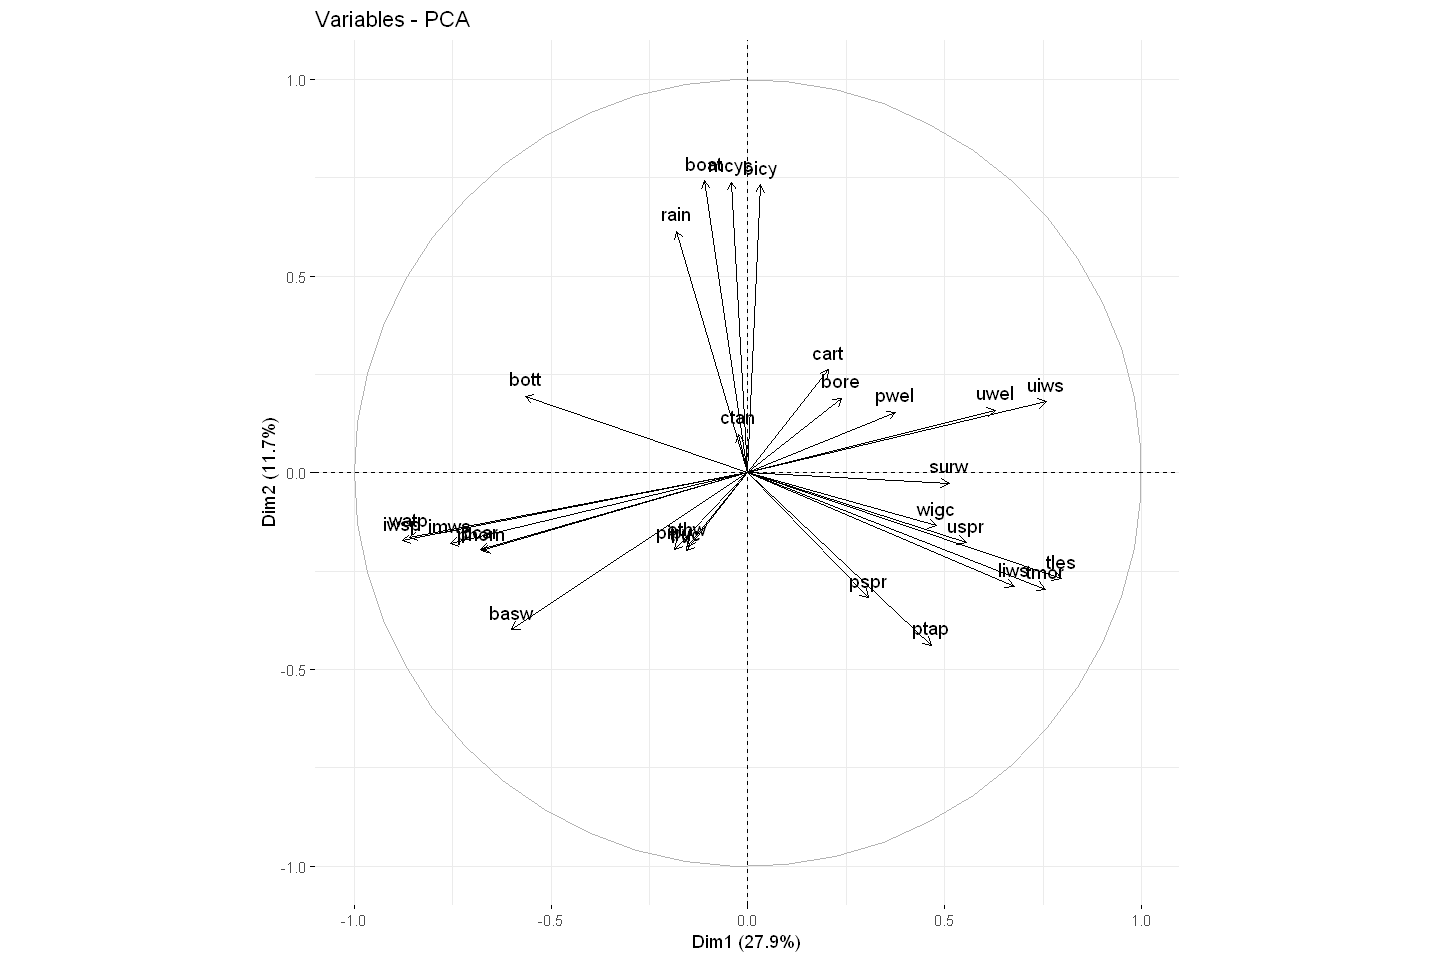

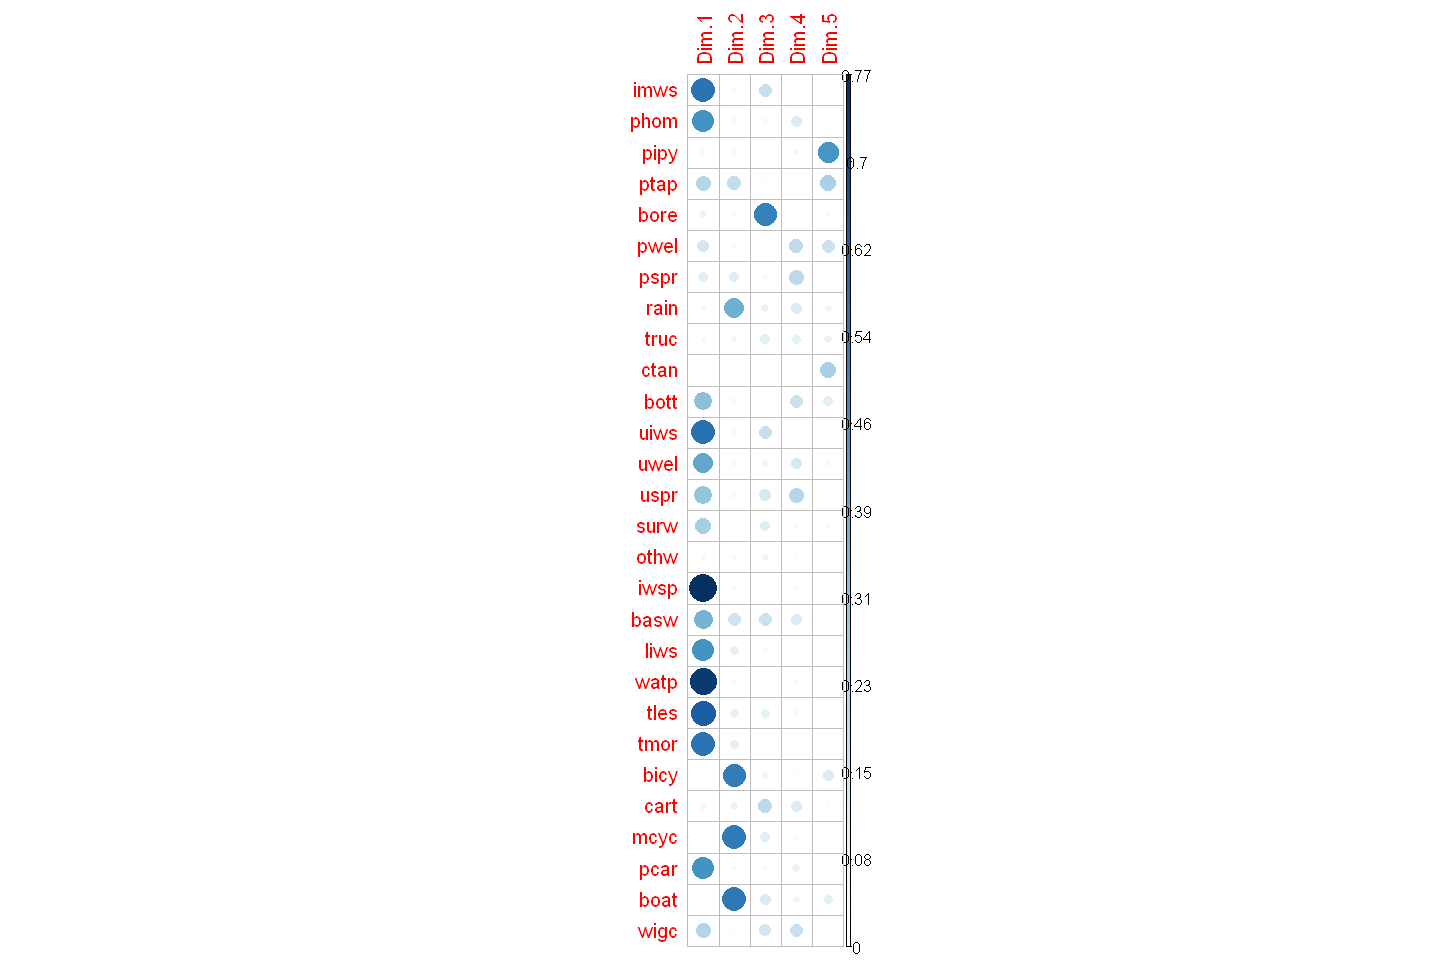

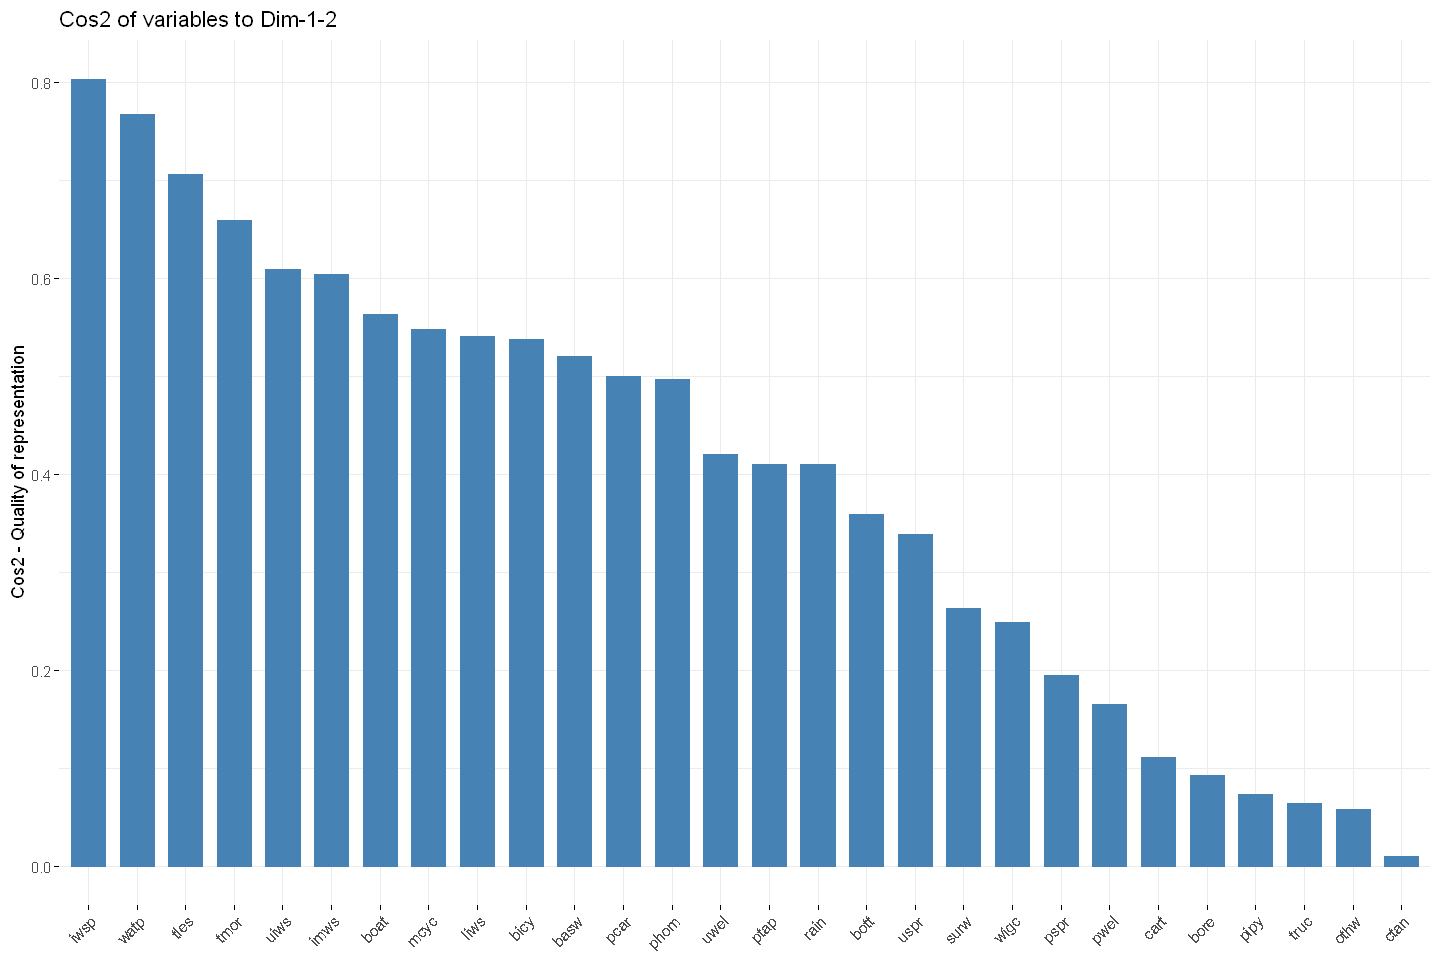

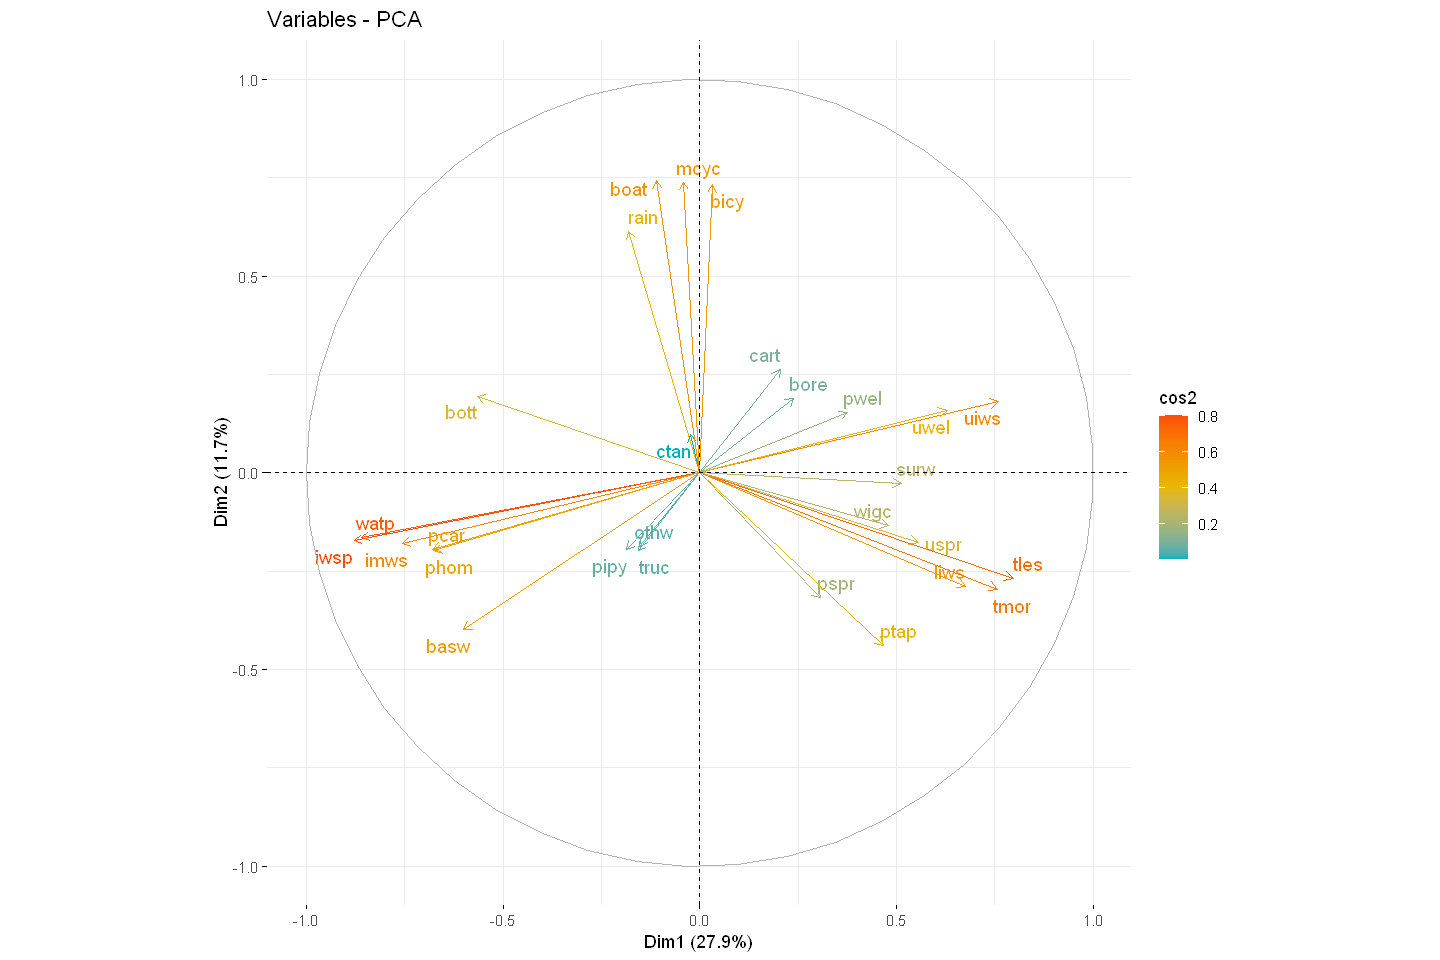

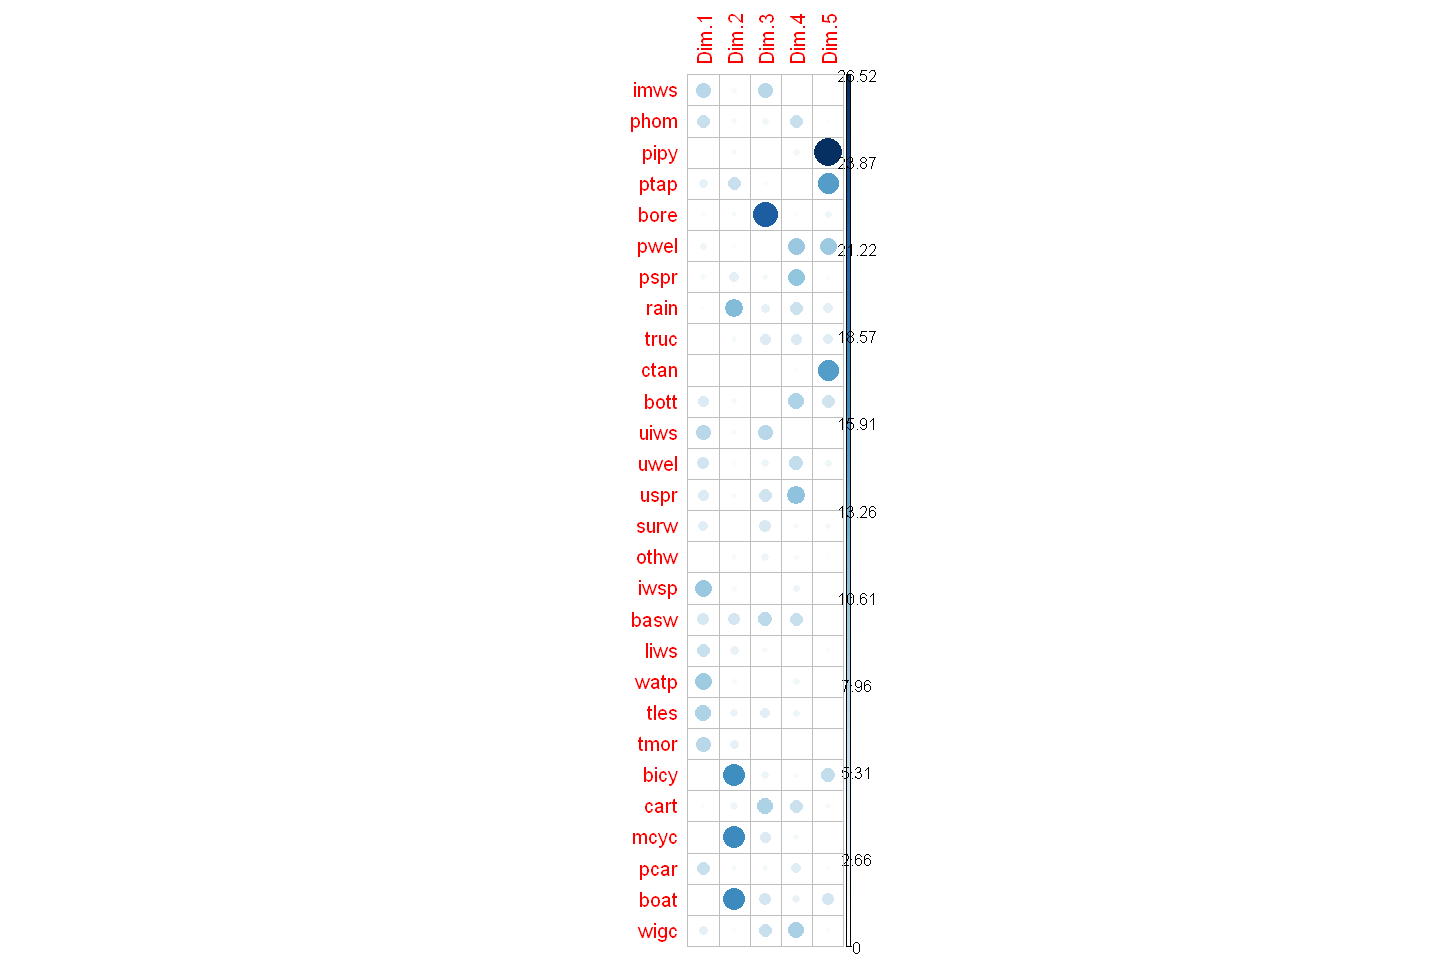

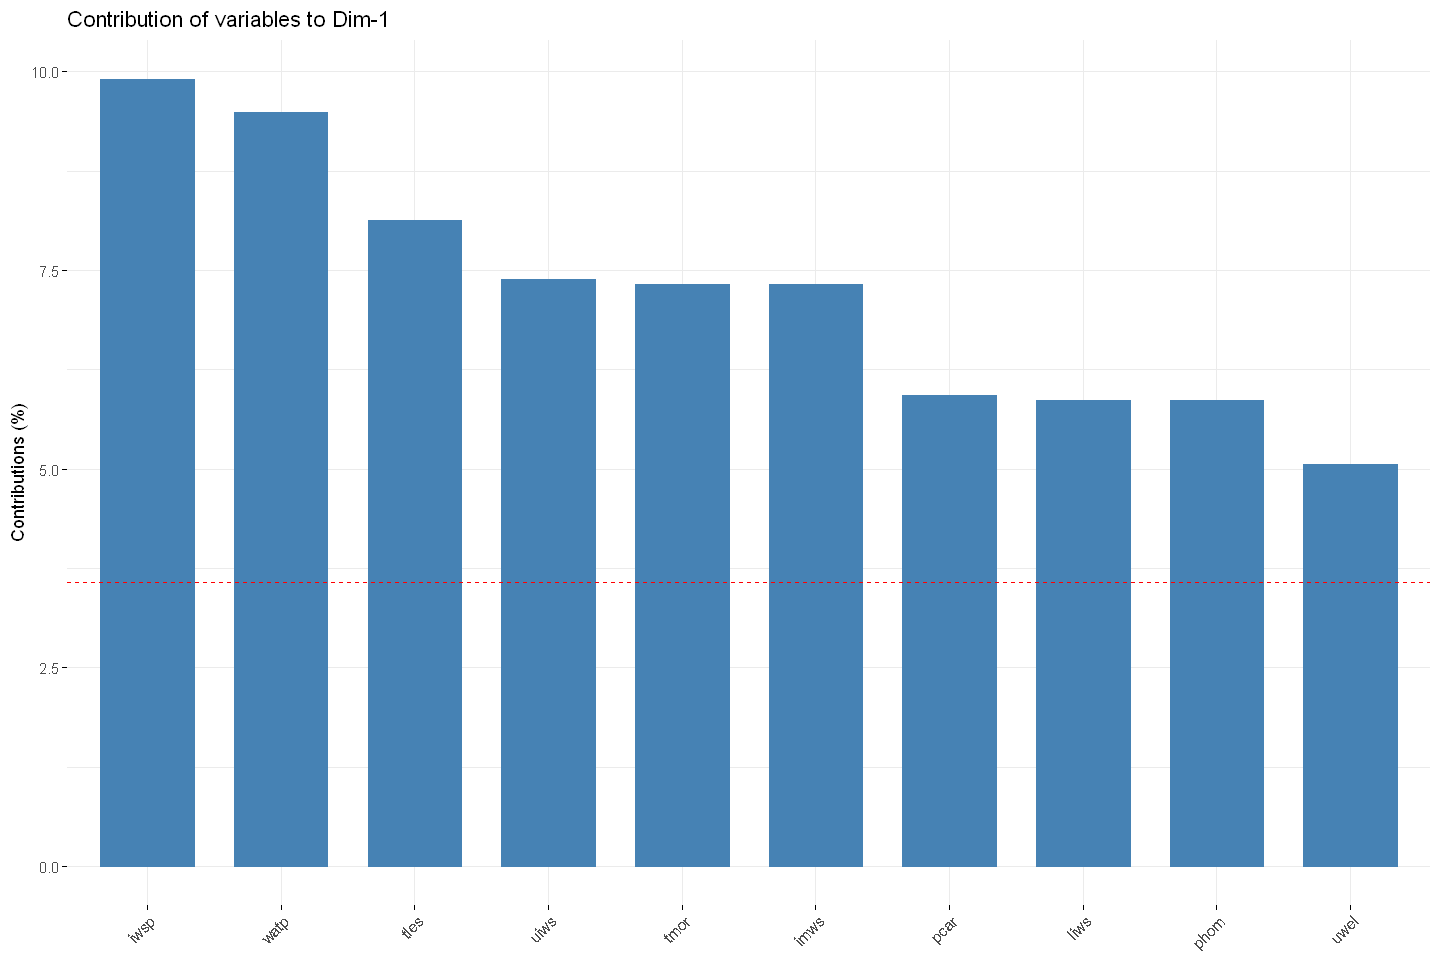

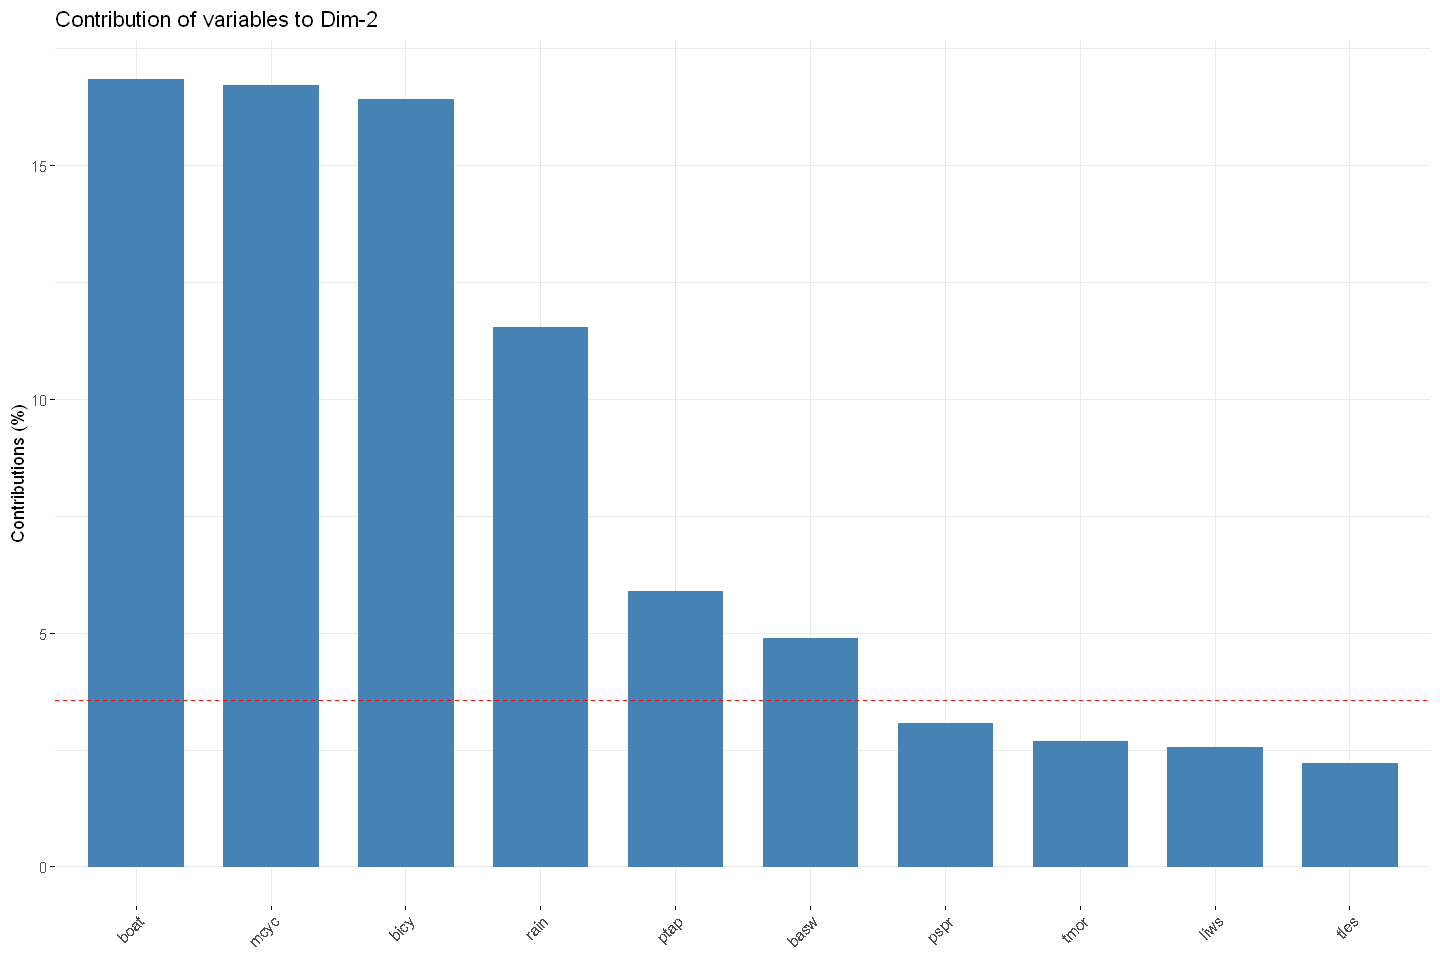

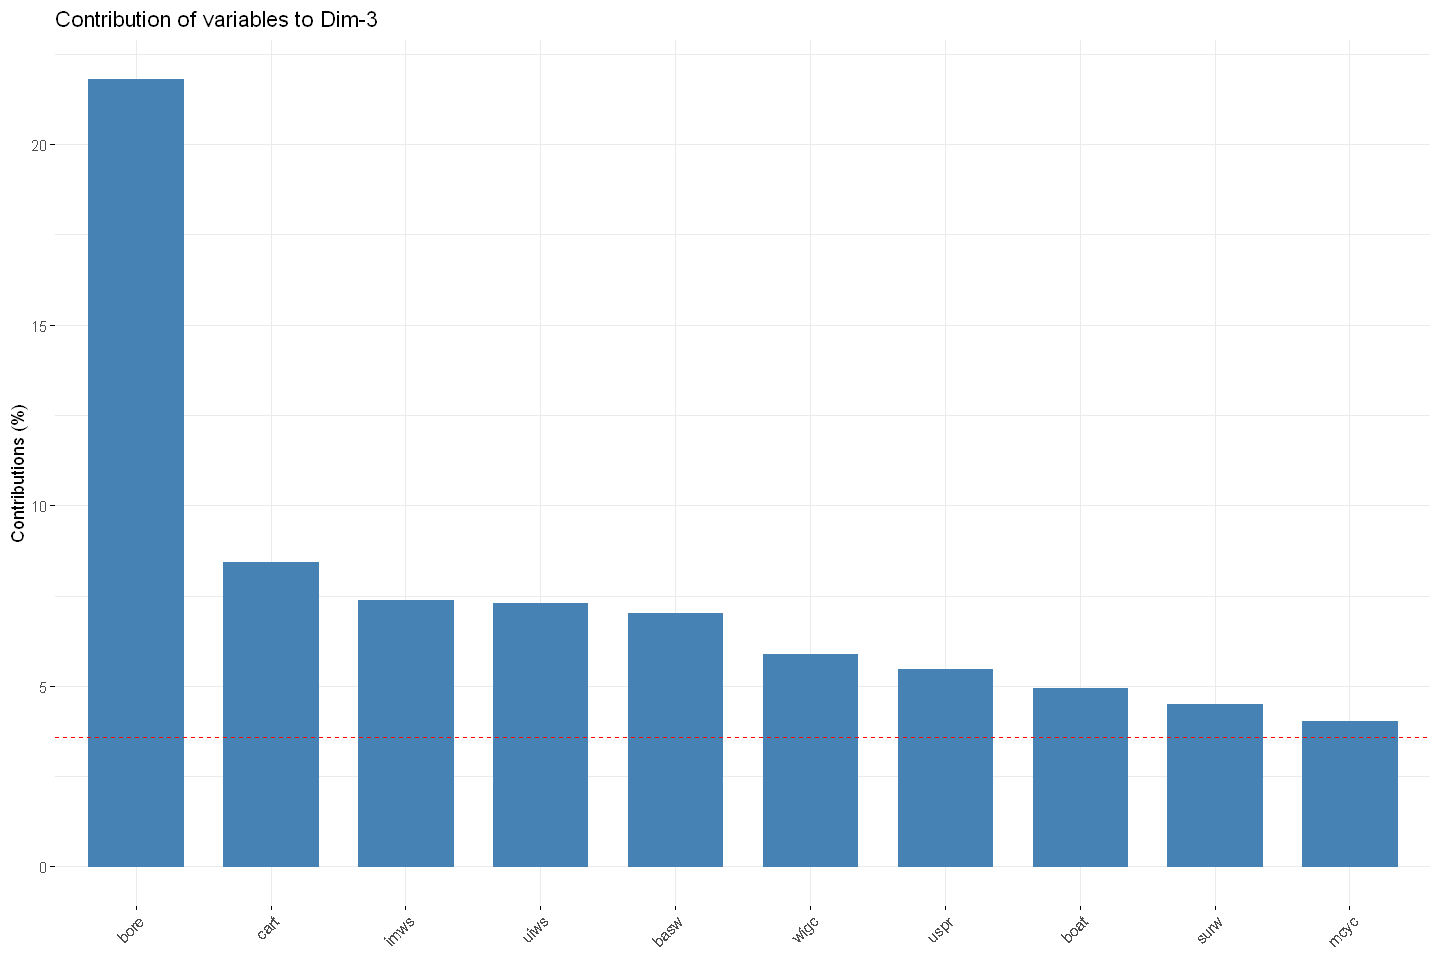

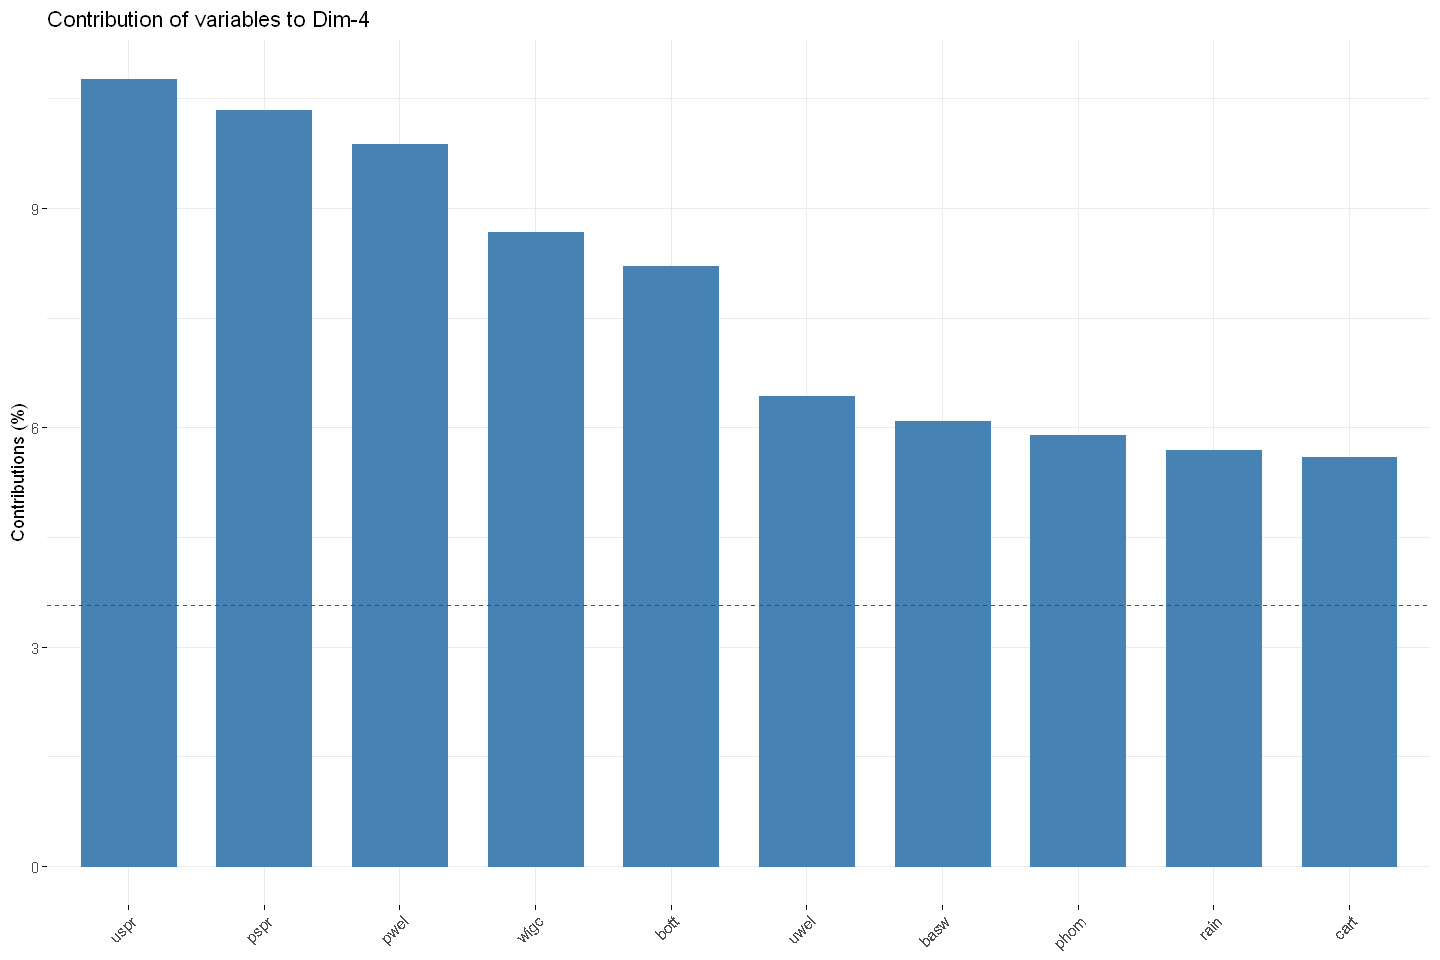

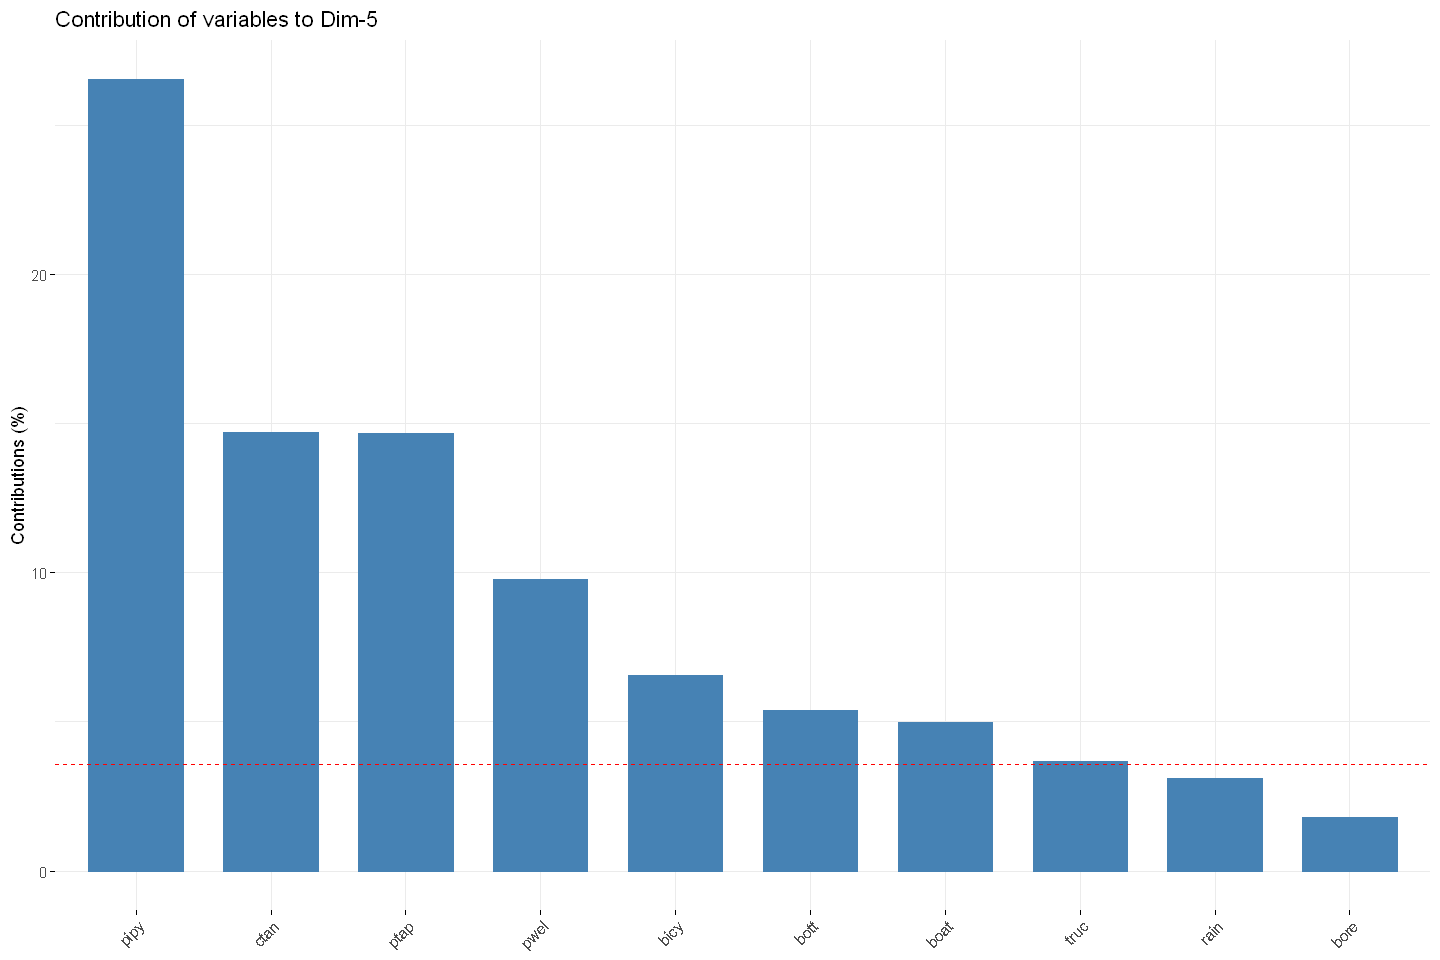

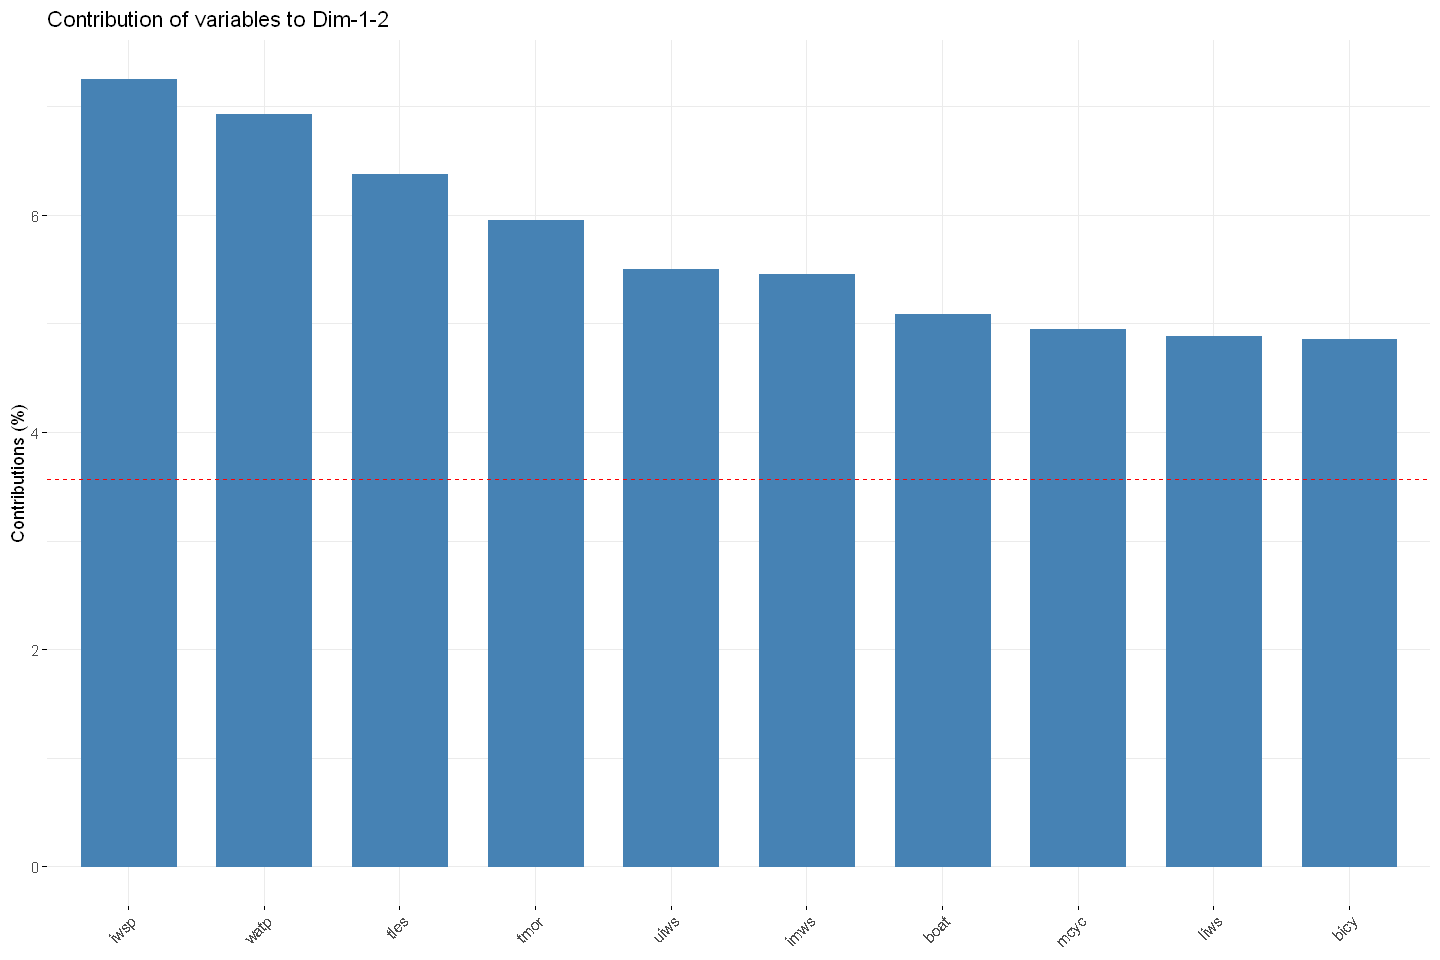

,correlation,p.value
tles,0.7962631,3.736473e-17
uiws,0.7590315,7.195341e-15
tmor,0.7561087,1.044456e-14
liws,0.6761947,5.205997e-11
uwel,0.6281548,2.698139e-09
uspr,0.5546165,3.556028e-07
surw,0.5119964,3.657421e-06
wigc,0.4802874,1.706670e-05
ptap,0.4667350,3.150725e-05
pwel,0.3755098,1.061618e-03


,correlation,p.value
boat,0.7419525,5.912878e-14
mcyc,0.7390776,8.293875e-14
bicy,0.7325080,1.767966e-13
rain,0.6138853,7.678125e-09
cart,0.2624688,2.487642e-02
tles,-0.2686557,2.155020e-02
liws,-0.2890799,1.312072e-02
tmor,-0.2958273,1.105122e-02
pspr,-0.3171481,6.258765e-03
basw,-0.3993762,4.648491e-04


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,1.397698,0.64934782,-0.2632163,-0.40180350,-2.0071820
2,-4.131647,-0.97917542,-0.7057115,-1.08240727,-1.2800756
3,1.913230,-0.74229233,-2.3128925,-0.07308256,-2.4758380
4,-5.086735,-1.70369276,-0.4414290,-0.91298338,-0.3871983
5,-2.460801,-1.78393456,-1.2722055,-1.00505144,-0.5025009
6,-1.630042,-0.03672443,3.3871065,1.35940615,-0.5886318


,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
1,0.09086482,1.961209e-02,0.003222512,0.0075092496,0.187388357
2,0.45232562,2.540538e-02,0.013196512,0.0310446045,0.043418612
3,0.10703548,1.611178e-02,0.156424379,0.0001561784,0.179241263
4,0.68429579,7.676234e-02,0.005153324,0.0220440517,0.003964904
5,0.31363038,1.648250e-01,0.083826171,0.0523168644,0.013077922
6,0.08318732,4.222497e-05,0.359184006,0.0578572450,0.010847926


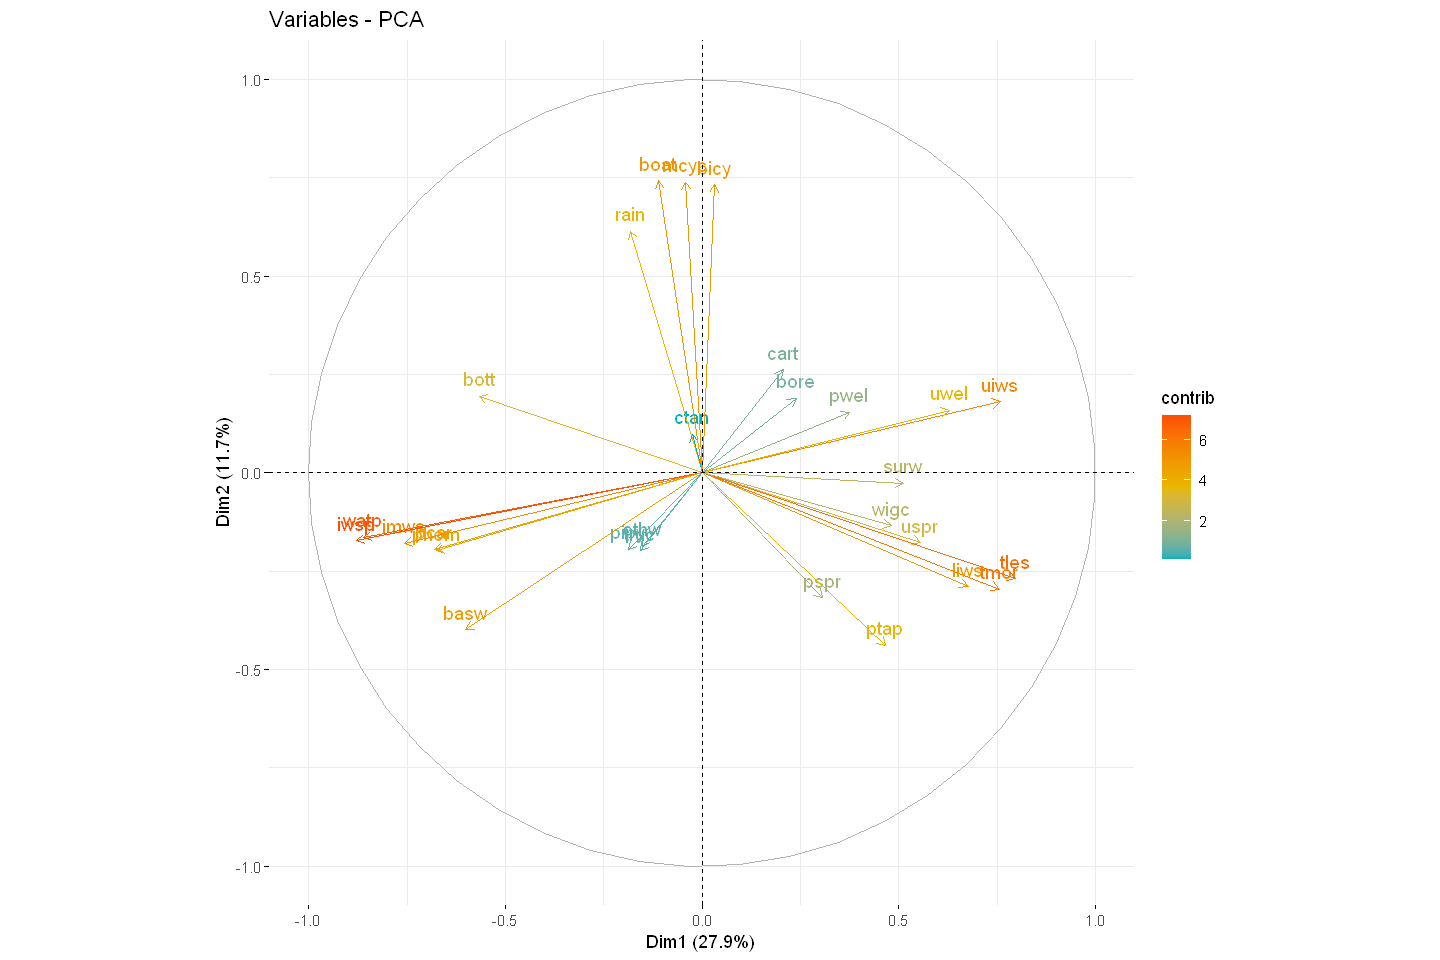

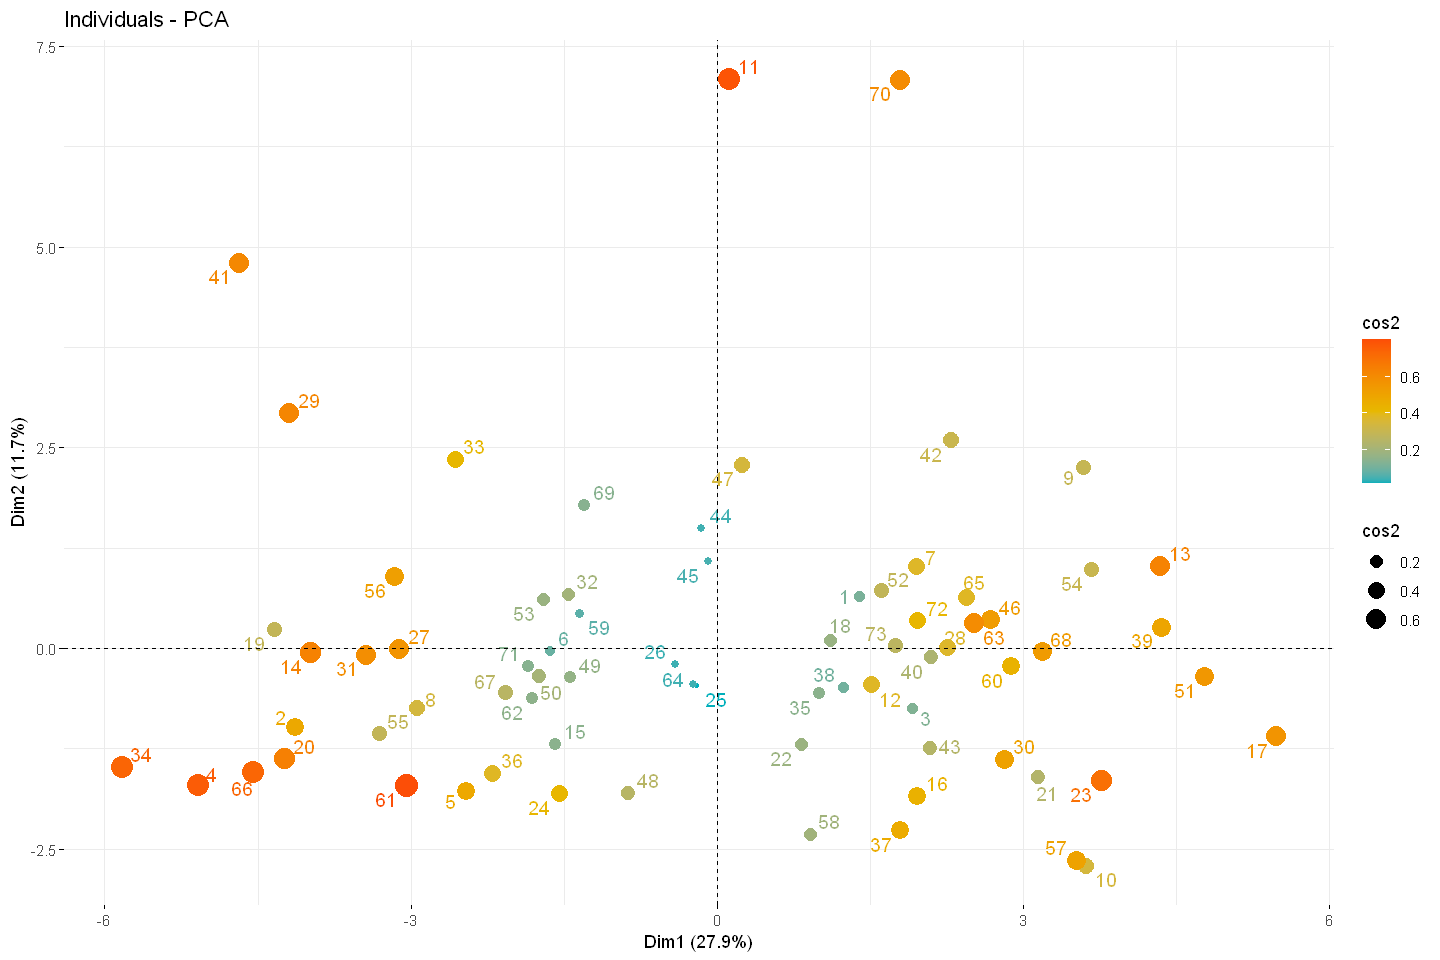

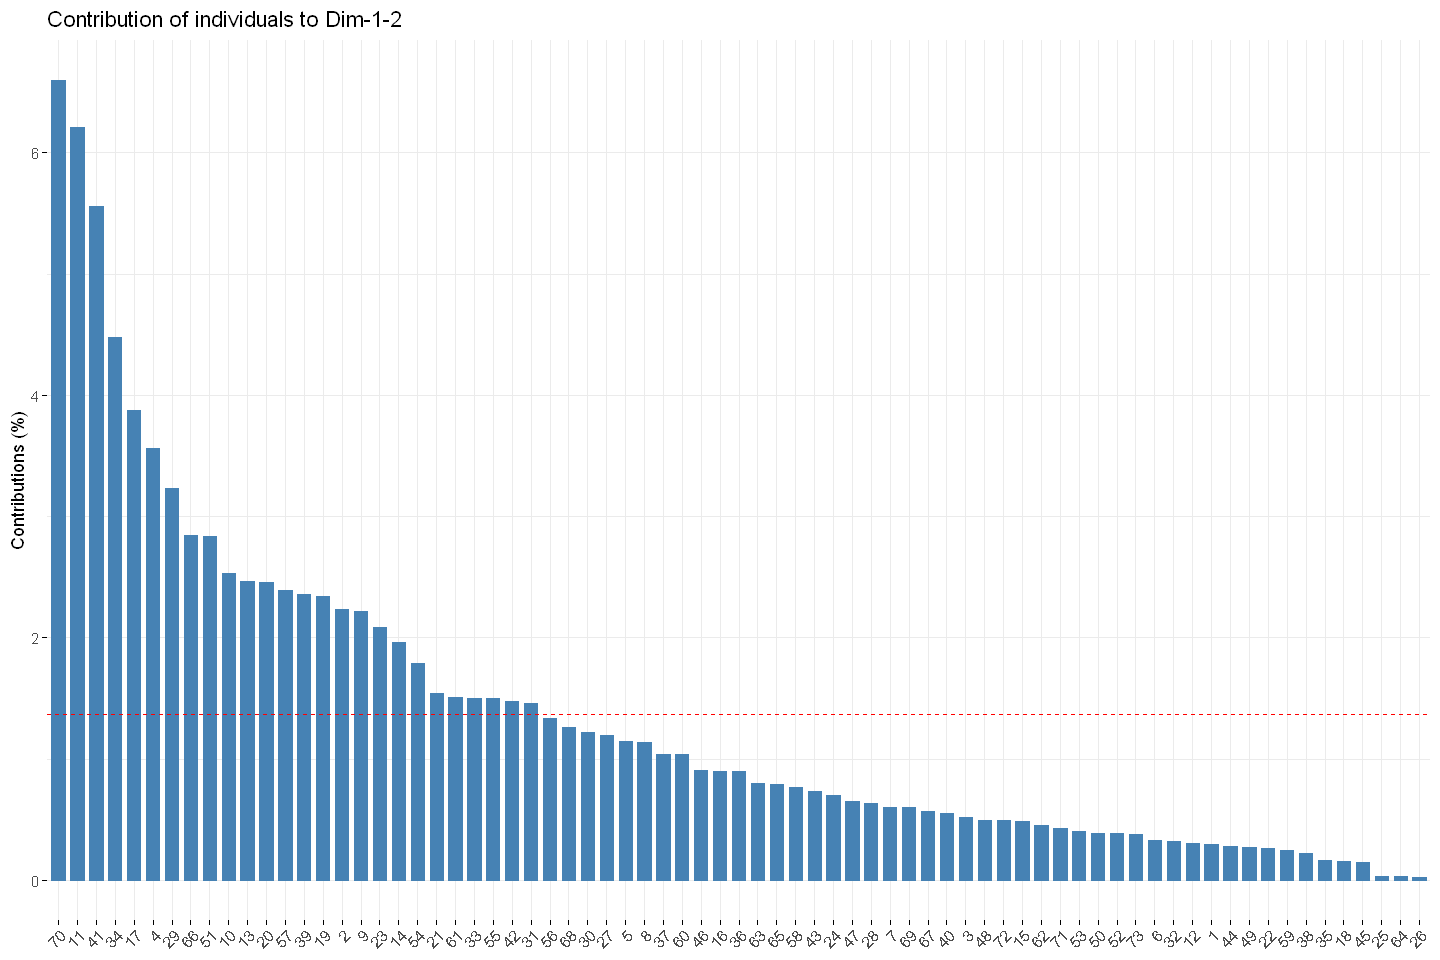

In [45]:
res.pca <- PCA(my_data, graph = FALSE)
print(res.pca)
eig.val <- get_eigenvalue(res.pca) #The object that is created using the function PCA() contains many information found in many different lists and matrices. These values are described in the next section.
eig.val
#An eigenvalue > 1 indicates that PCs account for more variance than accounted by one of the original variables in
#standardized data. This is commonly used as a cutoff point for which PCs are retained. This holds true only when
#the data are standardized.
fviz_eig(res.pca, addlabels = TRUE, ylim = c(0, 76))
var <- get_pca_var(res.pca)
var
# Coordinates
head(var$coord, 36)
# Cos2: quality on the factor map
head(var$cos2,36)
# Contributions to the principal components
head(var$contrib, 36)
#For all the 36 variables.
fviz_pca_var(res.pca, col.var = "black")
#The plot above is also known as variable correlation plots. It shows the relationships between all variables. It can be interpreted as follow:
#Positively correlated variables are grouped together.
#Negatively correlated variables are positioned on opposite sides of the plot origin (opposed quadrants).
#The distance between variables and the origin measures the quality of the variables on the factor map. Variables that
#are away from the origin are well represented on the factor map.
corrplot(var$cos2, is.corr=FALSE, tl.cex = 1 )
# Total cos2 of variables on Dim.1 and Dim.2
fviz_cos2(res.pca, choice = "var", axes = 1:2, tl.cex = 1)
#A high cos2 indicates a good representation of the variable on the principal component. In this case the variable is
#positioned close to the circumference of the correlation circle.
#A low cos2 indicates that the variable is not perfectly represented by the PCs.
#In this case the variable is close to the center of the circle.
#The cos2 values are used to estimate the quality of the representation
#The closer a variable is to the circle of correlations,
#the better its representation on the factor map (and the more important it is to interpret these components)
#Variables that are closed to the center of the plot are less important for the first components.
# Color by cos2 values: quality on the factor map
fviz_pca_var(res.pca, col.var = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), 
             repel = TRUE # Avoid text overlapping, 
    )
#variables with low cos2 values will be colored in "white"
#variables with mid cos2 values will be colored in "blue"
#variables with high cos2 values will be colored in red
corrplot(var$contrib, is.corr=FALSE,tl.cex = 1) 
#The larger the value of the contribution, the more the variable contributes to the component.
# Contributions of variables to PC1
fviz_contrib(res.pca, choice = "var", axes = 1, top = 10)
# Contributions of variables to PC2
fviz_contrib(res.pca, choice = "var", axes = 2, top = 10)
# Contributions of variables to PC3
fviz_contrib(res.pca, choice = "var", axes = 3, top = 10)
# Contributions of variables to PC4
fviz_contrib(res.pca, choice = "var", axes = 4, top = 10)
# Contributions of variables to PC5
fviz_contrib(res.pca, choice = "var", axes = 5, top = 10)
fviz_contrib(res.pca, choice = "var", axes = 1:2, top = 10)
#It can be seen that the variables H IWS P and H W - contribute the most to the dimensions 1 and 2.
fviz_pca_var(res.pca, col.var = "contrib",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07")
)
res.desc <- dimdesc(res.pca, axes = c(1,2), proba = 0.05)
# Description of dimension 1
res.desc$Dim.1
res.desc$Dim.2
ind <- get_pca_ind(res.pca)
# Coordinates of individuals
head(ind$coord)
# Quality of individuals
head(ind$cos2)
# Contributions of individuals
fviz_pca_ind(res.pca, col.ind = "cos2", pointsize = "cos2",
             gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"),
             repel = TRUE # Avoid text overlapping (slow if many points)
)
# Total contribution on PC1 and PC2
fviz_contrib(res.pca, choice = "ind", axes = 1:2, tl.cex = .5)